# **Yulu**

---



Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!



# **Business Problem**

---

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
yulu = pd.read_csv() ##hiding data path to maintain data privacy.
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# **DataSet**

---
The company collected **hourly data** for a **period of 2 years**. 

If we look at the data, we can see the data in these columns:
1. **season** -> change on monthly basis.
1. **holiday, workingday** -> change on daily basis.
2. **datetime, weather, temp, atemp, humidity, windspeed, casual, registered and count** -> change on an hourly basis.


# **Features**

---


1. **Datetime**: datetime
2. **Season**: season (1: spring, 2: summer, 3: fall, 4: winter)
3. **Holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. **workingday**: if day is neither weekend nor holiday, then 1, otherwise is 0.
4. **weather**:
  *  **1** -> Clear, Few clouds, partly cloudy, partly cloudy
  *  **2** -> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  *  **3** -> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  *  **4** -> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
5. **Temp**: temperature in Celsius
6. **Atemp**: feeling temperature in Celsius
7. **Humidity**: humidity
8. **Windspeed**: wind speed
9. **Casual**: count of casual users
10. **Registered**: count of registered users
11. **Count**: count of total rental bikes including both casual and registered

In [ ]:
yulu.shape

(10886, 12)

In [ ]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

***So, as we can see, there are no nulls in our dataset, which is good. Now we will be checking what kind of data we have in our dataframe in the individual features. It will help us have a sense of the data we are dealing with.***

In [ ]:
for column in yulu:
  print('\033[1;4m' + column + '\033[0m', end= ':- No. of Unique Values: ')
  print(yulu[column].nunique(), end= ';  Unique Values: ')
  print(yulu[column].unique())
  print()

datetime:- No. of Unique Values: 10886;  Unique Values: ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

season:- No. of Unique Values: 4;  Unique Values: [1 2 3 4]

holiday:- No. of Unique Values: 2;  Unique Values: [0 1]

workingday:- No. of Unique Values: 2;  Unique Values: [0 1]

weather:- No. of Unique Values: 4;  Unique Values: [1 2 3 4]

temp:- No. of Unique Values: 49;  Unique Values: [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]

atemp:- No. of Unique Values: 60;  Unique Values: [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79 

***Checking for duplicates***

In [ ]:
duplicate = yulu[yulu.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


***Descriptive Statistics for Features***

In [ ]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
yulu['season'].value_counts(normalize=True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

In [ ]:
yulu['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

In [ ]:
yulu['workingday'].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

In [ ]:
yulu['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

***As we can see from the data that we have counts of electric cycles rented per hour and also have weather, temperature, humidity values which change every year; we can intutively say, these factors impact the no. of cycles rented.***

***To enable better analysis i am going to add a few more columns to our existing data frame.*** 

In [ ]:
yulu["datetime"] = pd.to_datetime(yulu['datetime'])
yulu["date"] =yulu['datetime'].dt.day
yulu['month']=yulu['datetime'].dt.month
yulu['year'] = yulu['datetime'].dt.year
yulu['day'] = yulu['datetime'].dt.day_name()
yulu['time'] = yulu['datetime'].dt.time
yulu["onlydate"] =yulu['datetime'].dt.date
yulu['weekend']= np.where(((yulu['workingday']== 0) & (yulu['holiday']== 0)) , 1, 0)

In [ ]:
yulu.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,year,day,time,onlydate,weekend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,2011,Saturday,00:00:00,2011-01-01,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,2011,Saturday,01:00:00,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2011,Saturday,02:00:00,2011-01-01,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,2011,Saturday,03:00:00,2011-01-01,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,2011,Saturday,04:00:00,2011-01-01,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,1,2011,Saturday,05:00:00,2011-01-01,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,1,2011,Saturday,06:00:00,2011-01-01,1


In [ ]:
yulu['weekend'].value_counts(normalize=True)

0    0.709443
1    0.290557
Name: weekend, dtype: float64

# ***Inferences:***

---

1. **Datetime**: Count of cycle rented and weather conditions data of approx 10.8K hours spread over a span of 2 years recorded.
2. **Season**: We have 4 seasons, equally distributed.  
3. **workingday**: 68% of these hours have been recorded from working days and 31% from non working days.
4. **weather**: weather -1 which is-> Clear, Few clouds, partly cloudy, partly cloudy is the most frequently occuring weather, followed by weather -2. out of these 10.8K hours, only 1 hour recorded a weather of category 4.
5. **Temp**: The mean temperature is 20.23 degrees, maximum temp climbing upto 41 degrees and minimum being 0.82 degrees.
6. **Atemp**: The mean temperature felt is 23.65 degrees, maximum temp climbing upto 45 degrees and minimum being 0.7 degrees.
7. **Humidity**: The mean humidity is 61 g/m^3, maximum humidity climbing upto 100 g/m^3 and minimum being 0 g/m^3.
8. **Windspeed**: The 25 percentile to 75 percentile windspeed is between 7km/hr and 17km/hr.
9. **Casual**: average count of casual users on a hourly basis is 36 users. maximum casual users recorded in an hour is 367 and minimum is 0.
10. **Registered**: average count of registered users on an hourly basis is 155 users. maximum registered users in an hour is 886 and minimum is zero.
11. **Count**: average count of total rental bikes including both casual and registered on an hourly basis is 191. 

# ***Visual Analysis***

---


***1. Correlation***

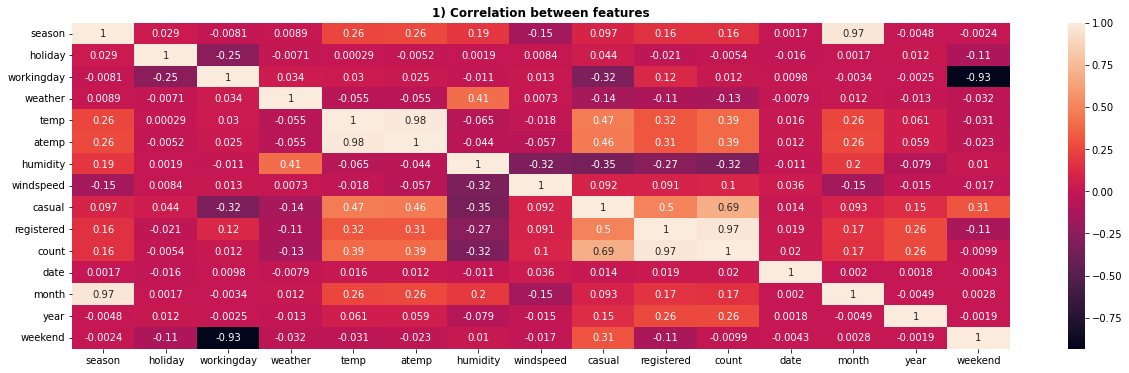

In [ ]:
plt.figure(figsize = (21,6))
sns.heatmap(yulu.corr(), annot=True)
plt.title('1) Correlation between features',fontweight="bold")
plt.show()

# ***Inferences***

---
The heatmap for correlation shows:

1. It shows a correlation between **temp, atemp and count of bikes rented**.
2. It shows a correlation between **season and temperature and humidity**.
3. It shows a correlation between **humidity and weather**.
4. It shows a correlation between **count and month**.


***2. Univariate Analysis***

In [ ]:
holiday_count=yulu.groupby(['holiday'])['count'].sum()
holiday_count

holiday
0    2027668
1      57808
Name: count, dtype: int64

In [ ]:
workingday_count=yulu.groupby(['workingday'])['count'].sum()
workingday_count

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [ ]:
weather_count=yulu.groupby(['weather'])['count'].sum()
weather_count

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [ ]:
season_count=yulu.groupby(['season'])['count'].sum()
season_count

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [ ]:
weekend_count=yulu.groupby(['weekend'])['count'].sum()
weekend_count

weekend
0    1488412
1     597064
Name: count, dtype: int64

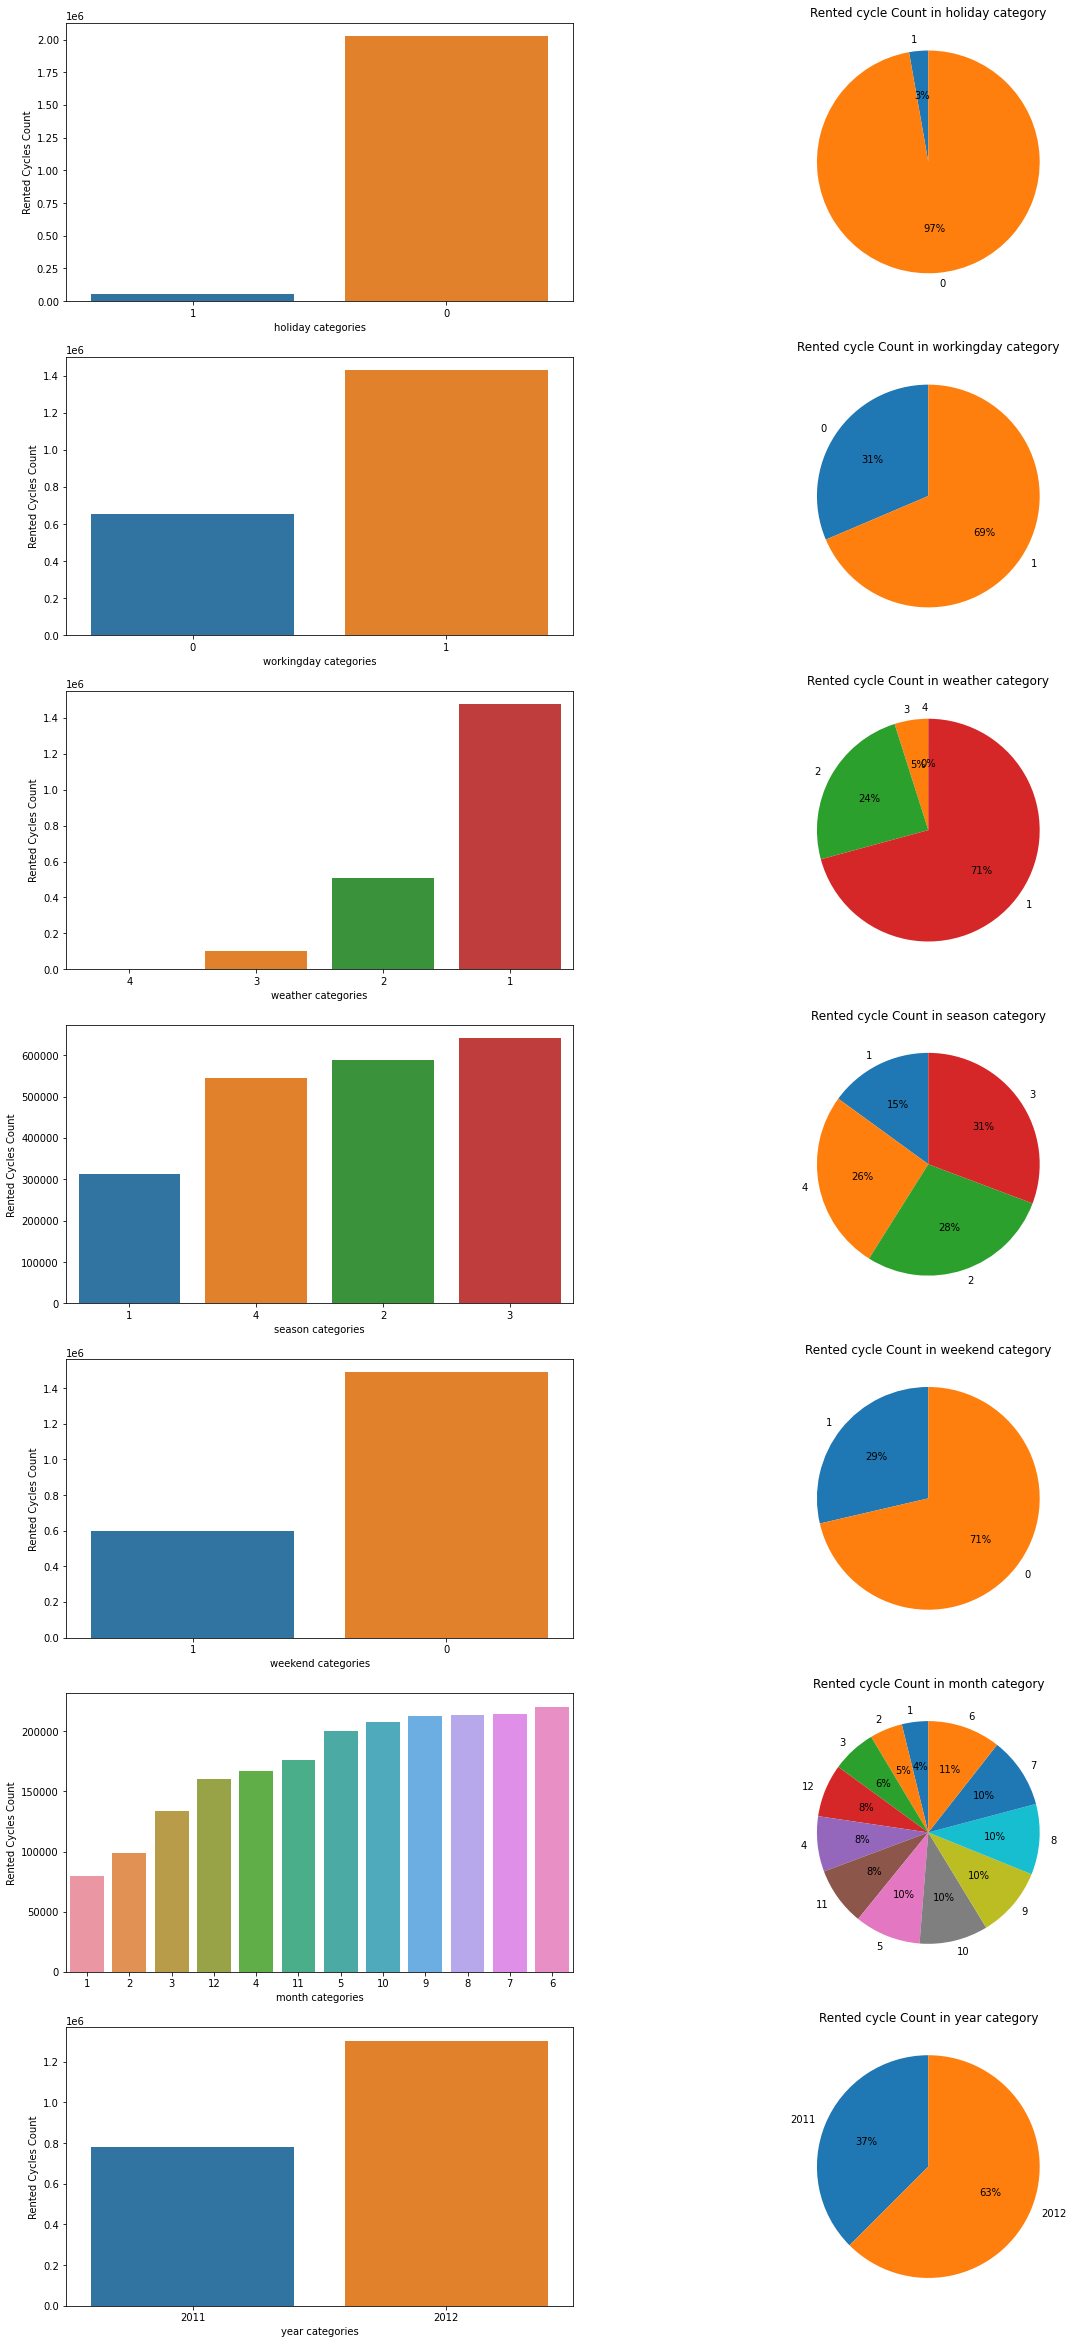

In [ ]:
df = yulu
colnames=['holiday', 'workingday', 'weather', 'season', 'weekend', 'month', 'year', ]
plt.figure(figsize = (20, len(colnames)*6 ))
k=1
for colname in colnames:
  plt.subplot(len(colnames),2,k)
  s = df.groupby(colname)['count'].sum().sort_values(ascending=True)
  g = sns.barplot(data=s, x=s.index, y=s.values )
  g.set(xticklabels=s.index)
  g.set_ylabel("Rented Cycles Count")
  g.set_xlabel(f"{colname} categories")
  k+=1
  plt.subplot(len(colnames),2,k)
  plt.pie(s, labels=s.index, autopct='%.0f%%', startangle = 90)
  plt.title(f'Rented cycle Count in {colname} category')
  k+=1

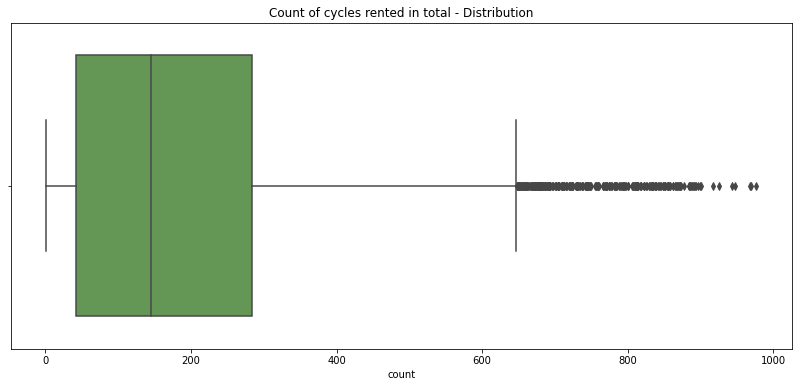

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='count', palette='gist_earth')
plt.title("Count of cycles rented in total - Distribution")
plt.show()

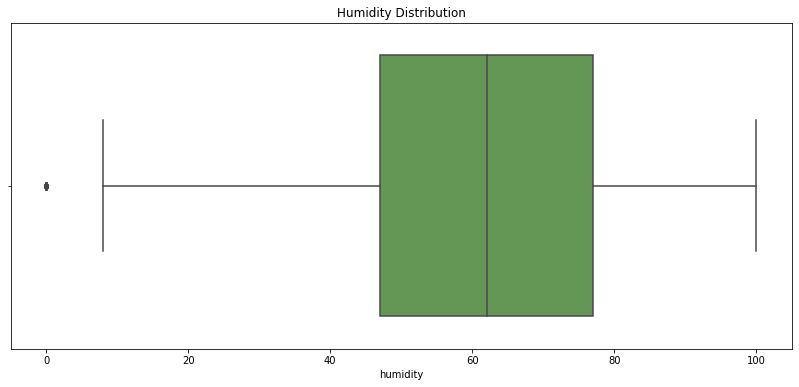

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='humidity', palette='gist_earth')
plt.title("Humidity Distribution")
plt.show()

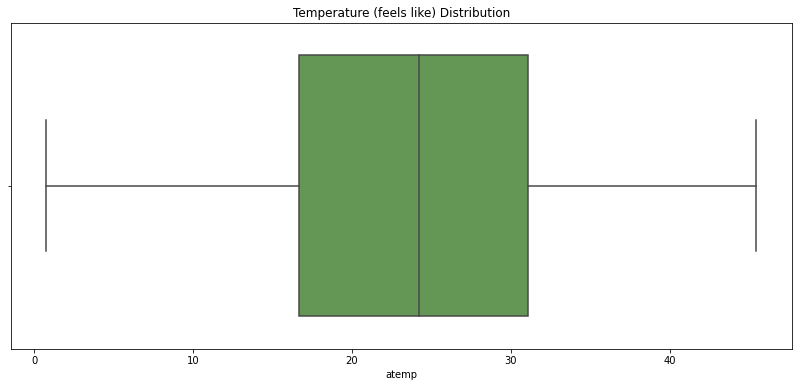

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='atemp', palette='gist_earth')
plt.title("Temperature (feels like) Distribution")
plt.show()

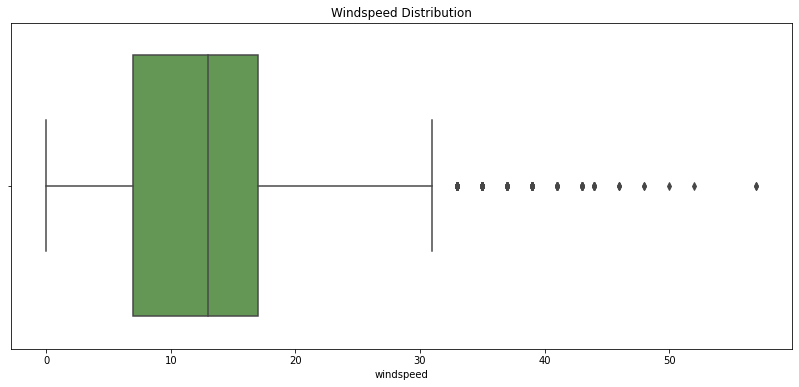

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='windspeed', palette='gist_earth')
plt.title("Windspeed Distribution")
plt.show()

# ***Inferences***

---
1. **Season**: Season 3 sees the highest amount of cycles rented, followed by 2, 4 and 1.
4. **weather**: Users mostly rent cycle during weather 1, followed by 2 and 3. Weather 4 was recorded only once in the period of 2 years.
6. **Atemp**: The average temperature while users rent cycles fall between 17 degrees to 31 degrees.
7. **Humidity**: Humidity generally is between 47 to 77, with some outliers at 0.
8. **Windspeed**: The 25 percentile to 75 percentile windspeed is between 7km/he and 17km/hr. 
9. **Casual**: average count of casual users on a hourly basis is 36 users. maximum casual users recorded in an hour is 367 and minimum is 0.
10. **Registered**: average count of registered users on an hourly basis is 155 users. maximum registered users in an hour is 886 and minimum is zero.
11. **Count**: 
  * 2012 saw a significance rise in cycle rent count (63%) as compared to 2011 (37%)
  * only 21% cycle rents happened over the weekends , whereas weekdays contributed to 79% of cycle rent count.
  * Month of June (all at 11% of gross cycle rents) saw the maximam gross of Cycle rents, followed by May, July, August, September and October (all at 10% of gross cycle rents)
  * Gross Cycle rents Maximum at season 3 followed by Season 2.
  * Cycle rents were maximum at Weather Category 1 (71%), followed by weather category 2 (24%)

***2. Bivariate Analysis***

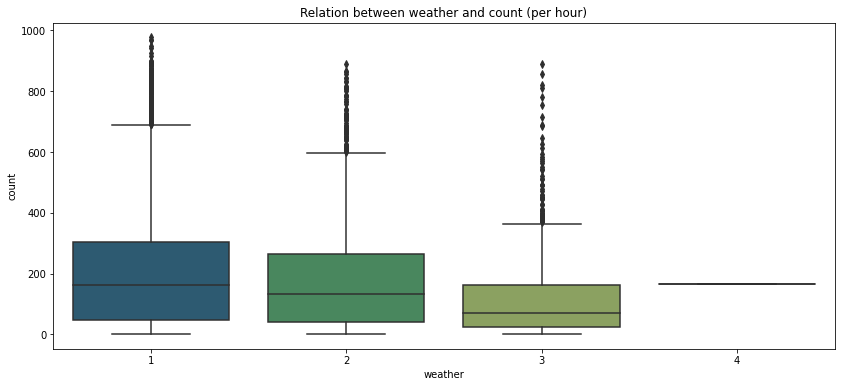

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='weather', y= 'count', palette='gist_earth')
plt.title("Relation between weather and count (per hour)")
plt.show()

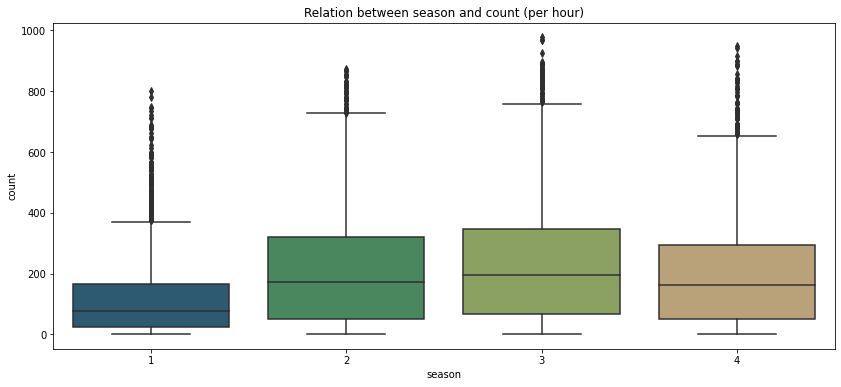

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='season', y= 'count', palette='gist_earth')
plt.title("Relation between season and count (per hour)")
plt.show()

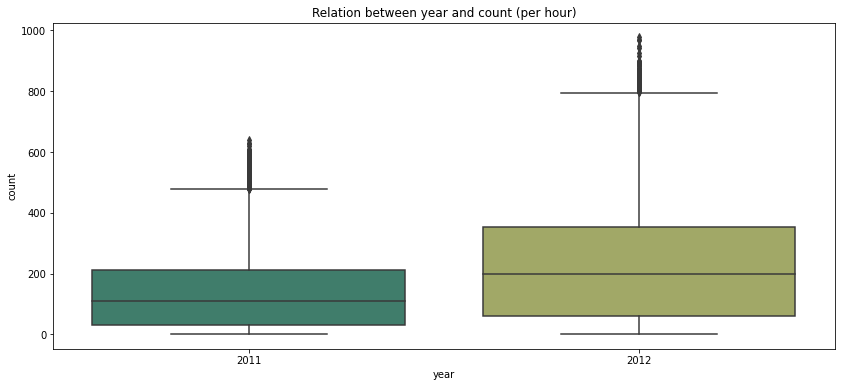

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='year', y= 'count', palette='gist_earth')
plt.title("Relation between year and count (per hour)")
plt.show()

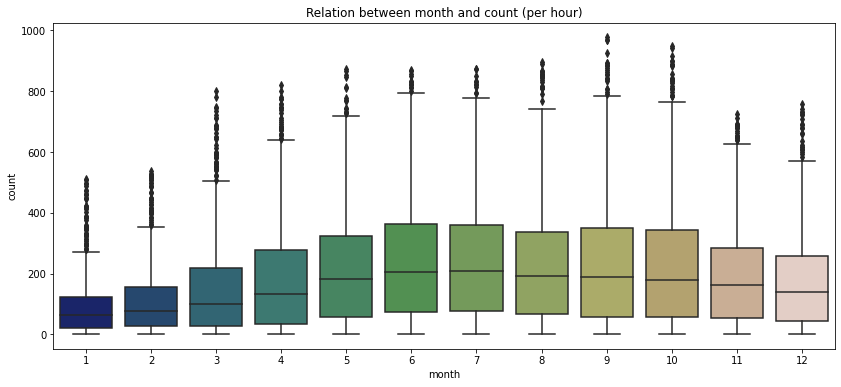

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='month', y= 'count', palette='gist_earth')
plt.title("Relation between month and count (per hour)")
plt.show()

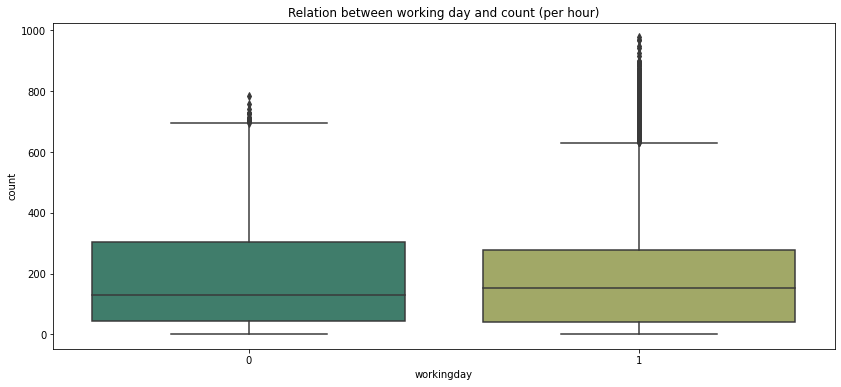

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='workingday', y= 'count', palette='gist_earth')
plt.title("Relation between working day and count (per hour)")
plt.show()

<Figure size 1008x432 with 0 Axes>

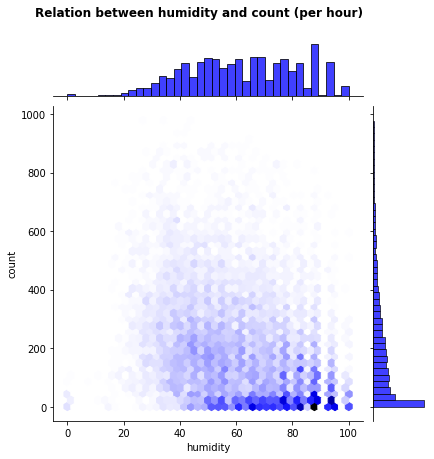

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="ticks")
sns.jointplot(x=yulu['humidity'], y=yulu['count'], kind="hex", color="b")
plt.title("Relation between humidity and count (per hour)", loc = "right",pad= 90,fontweight="bold")
plt.show()

<Figure size 1008x432 with 0 Axes>

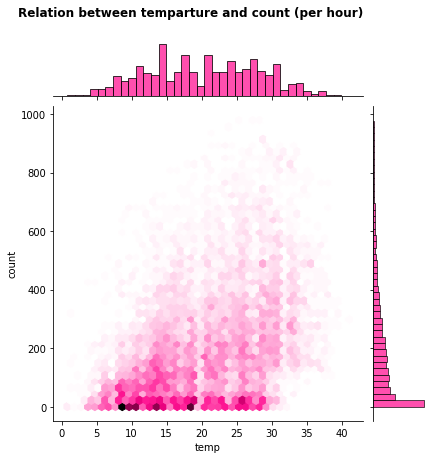

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="ticks")
sns.jointplot(x=yulu['temp'], y=yulu['count'], kind="hex", color="deeppink")
plt.title("Relation between temparture and count (per hour)", loc = "right",pad= 90,fontweight="bold")
plt.show()

<Figure size 1008x432 with 0 Axes>

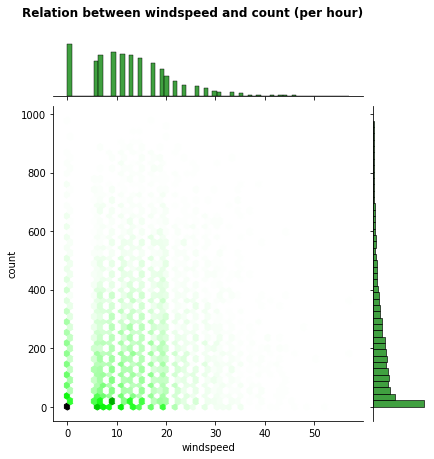

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="ticks")
sns.jointplot(x=yulu['windspeed'], y=yulu['count'], kind="hex", color="g")
plt.title("Relation between windspeed and count (per hour)", loc = "right",pad= 90,fontweight="bold")
plt.show()

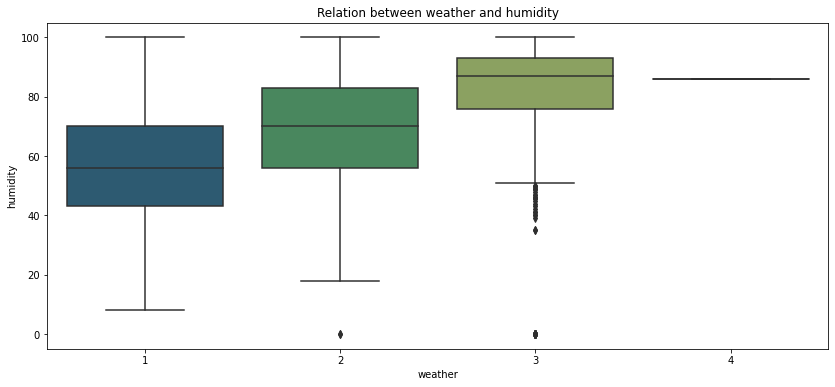

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='weather', y= 'humidity', palette='gist_earth')
plt.title("Relation between weather and humidity")
plt.show()

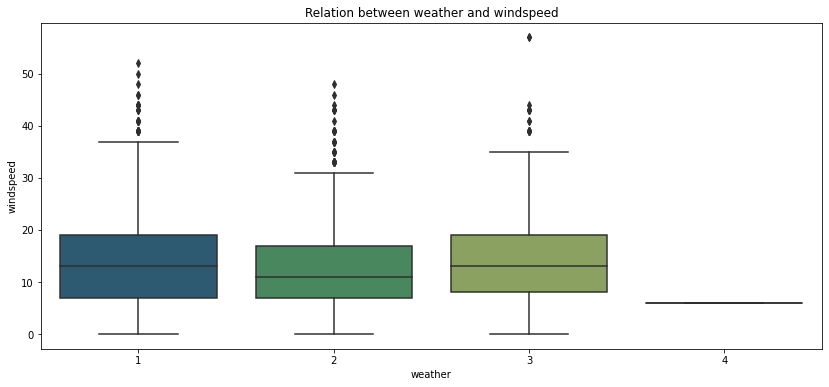

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='weather', y= 'windspeed', palette='gist_earth')
plt.title("Relation between weather and windspeed")
plt.show()

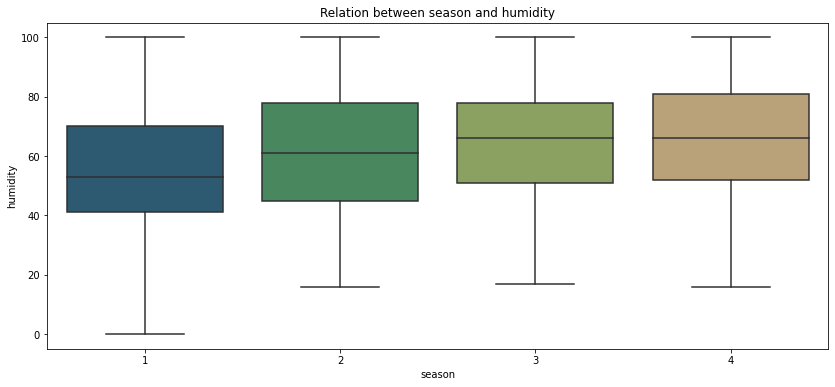

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='season', y= 'humidity', palette='gist_earth')
plt.title("Relation between season and humidity")
plt.show()

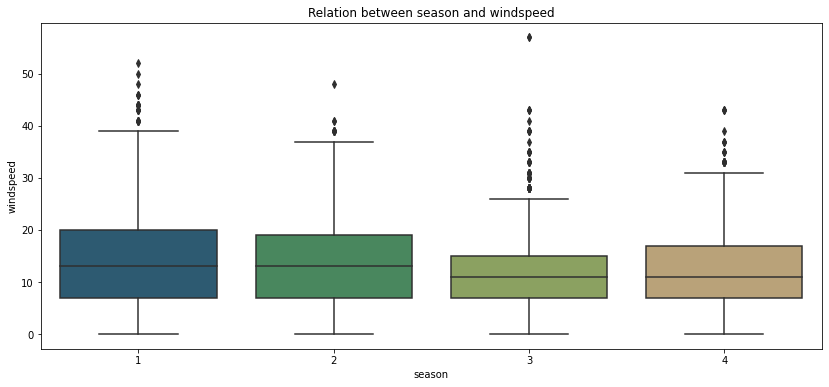

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='season', y= 'windspeed', palette='gist_earth')
plt.title("Relation between season and windspeed")
plt.show()

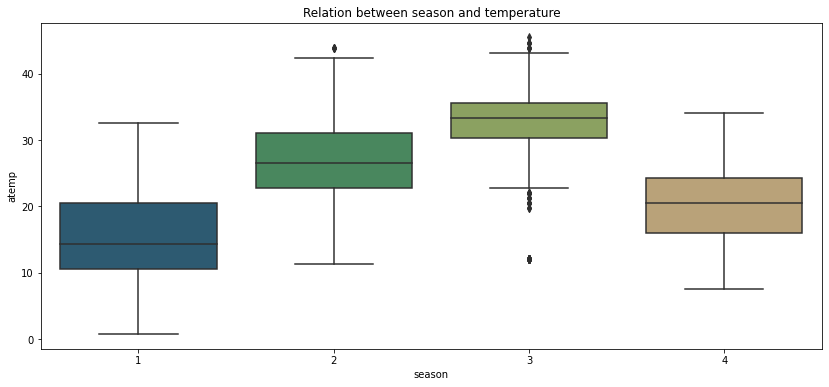

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='season', y= 'atemp', palette='gist_earth')
plt.title("Relation between season and temperature")
plt.show()

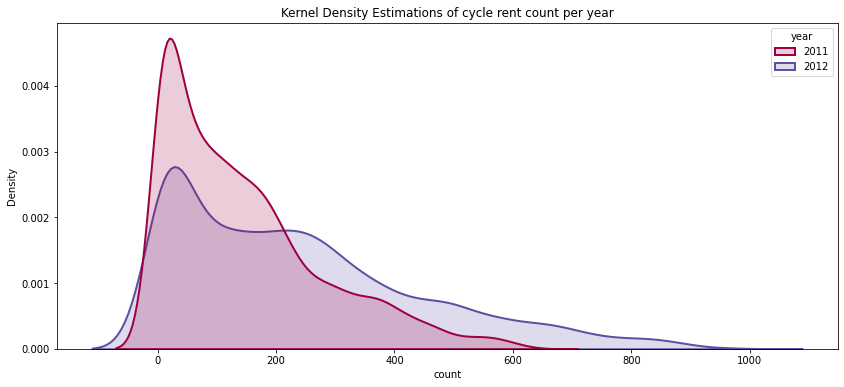

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(data=yulu, x="count", hue="year", fill=True, common_norm=False,  palette='Spectral', alpha=.2, linewidth=2)
plt.title("Kernel Density Estimations of cycle rent count per year")
plt.show()

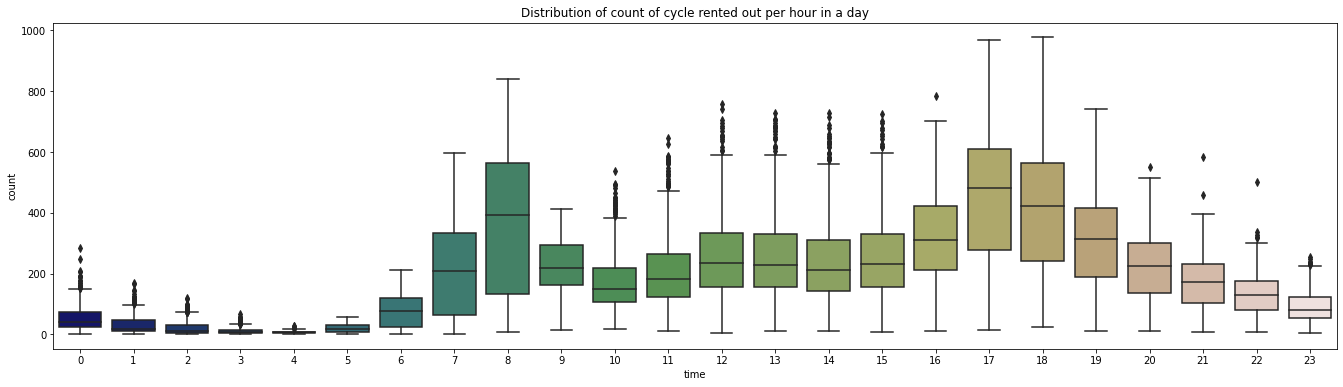

In [ ]:
yulu['time'] = yulu['time'].astype(str).apply(lambda x: x[:2]).astype(int)
plt.figure(figsize = (23,6))
sns.boxplot(data=yulu, x='time', y= 'count', palette='gist_earth')
plt.title("Distribution of count of cycle rented out per hour in a day")
plt.show()

***PER DAY ANALYSIS***

In [ ]:
modf_yulu = yulu.copy()
modf_yulu.drop(labels = ['datetime',  'weather', 'time', 'windspeed'], axis = 1, inplace= True)
modf_yulu['Total_Count'] = modf_yulu['count'].groupby(modf_yulu['onlydate']).transform('sum')
modf_yulu['Total_Casual'] = modf_yulu['casual'].groupby(modf_yulu['onlydate']).transform('sum')
modf_yulu['Total_Registered'] = modf_yulu['registered'].groupby(modf_yulu['onlydate']).transform('sum')
modf_yulu['temp']= modf_yulu['temp'].groupby(modf_yulu['onlydate']).transform('mean')
modf_yulu['atemp']= modf_yulu['atemp'].groupby(modf_yulu['onlydate']).transform('mean')
modf_yulu['humidity']= modf_yulu['humidity'].groupby(modf_yulu['onlydate']).transform('mean')
modf_yulu.drop(labels = ['registered','casual', 'count'], axis = 1, inplace= True)
modf_yulu.drop_duplicates(inplace=True)
modf_yulu.head(5)

,season,holiday,workingday,temp,atemp,humidity,date,month,year,day,onlydate,weekend,Total_Count,Total_Casual,Total_Registered
0,1,0,0,14.110833,18.181250,80.583333,1,1,2011,Saturday,2011-01-01,1,985,331,654
24,1,0,0,14.902609,17.686957,69.608696,2,1,2011,Sunday,2011-01-02,1,801,131,670
47,1,0,1,8.050909,9.470227,43.727273,3,1,2011,Monday,2011-01-03,0,1349,120,1229
69,1,0,1,8.200000,10.606087,59.043478,4,1,2011,Tuesday,2011-01-04,0,1562,108,1454
92,1,0,1,9.305217,11.463478,43.695652,5,1,2011,Wednesday,2011-01-05,0,1600,82,1518


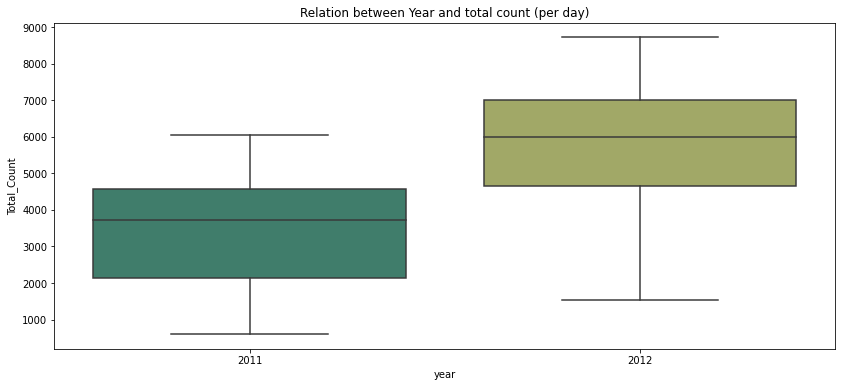

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='year', y= 'Total_Count', palette='gist_earth')
plt.title("Relation between Year and total count (per day)")
plt.show()

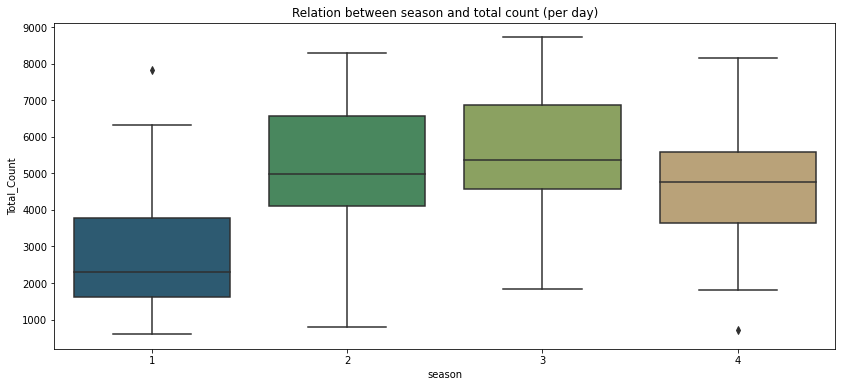

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='season', y= 'Total_Count', palette='gist_earth')
plt.title("Relation between season and total count (per day)")
plt.show()

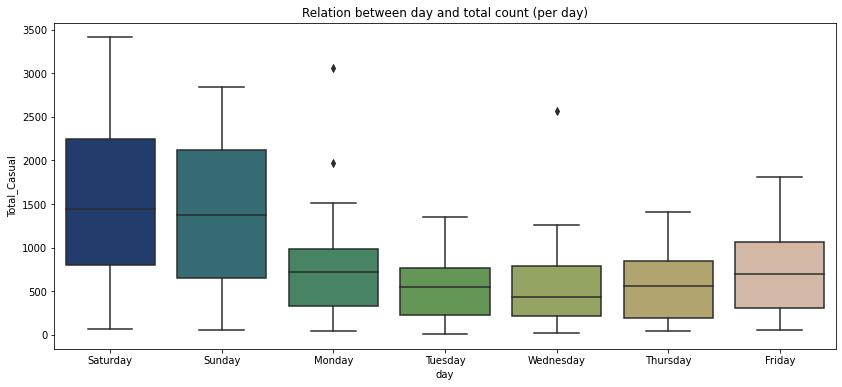

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='day', y= 'Total_Casual', palette='gist_earth')
plt.title("Relation between day and total count (per day)")
plt.show()

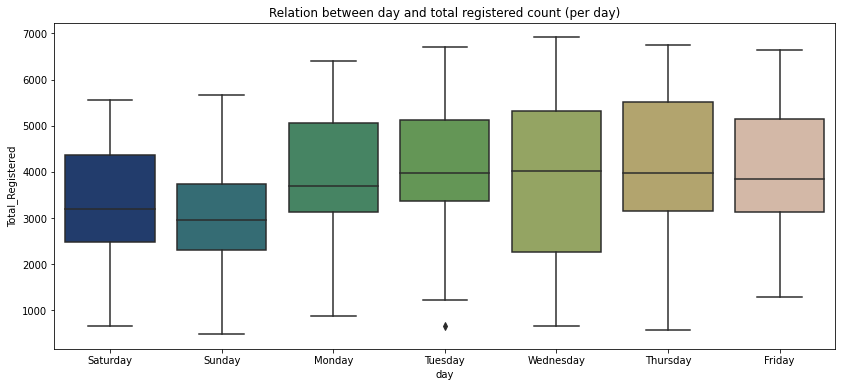

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='day', y= 'Total_Registered', palette='gist_earth')
plt.title("Relation between day and total registered count (per day)")
plt.show()

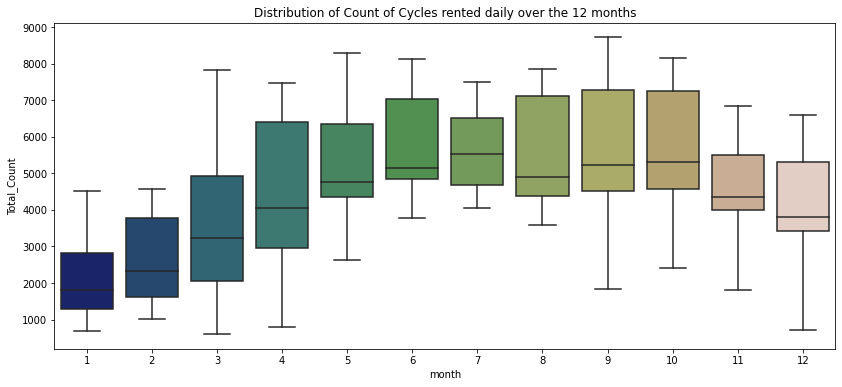

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='month', y= 'Total_Count', palette='gist_earth')
plt.title("Distribution of Count of Cycles rented daily over the 12 months")
plt.show()

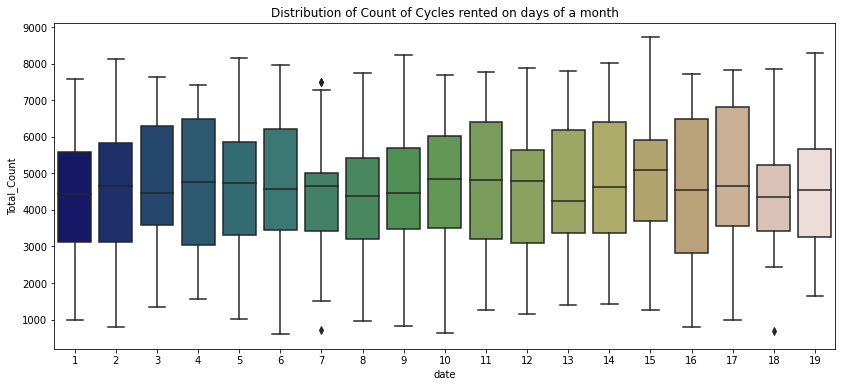

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='date', y= 'Total_Count', palette='gist_earth')
plt.title("Distribution of Count of Cycles rented on days of a month")
plt.show()

<Figure size 1008x432 with 0 Axes>

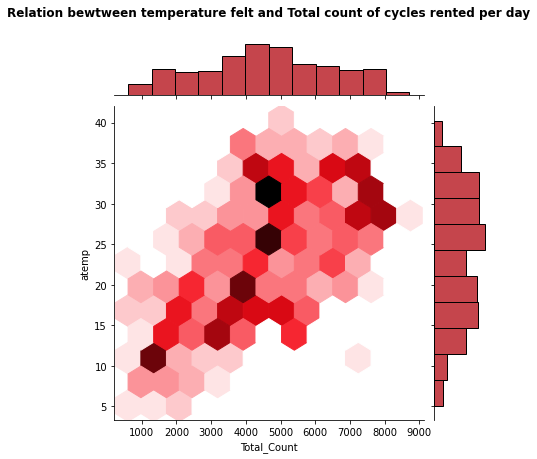

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="ticks")
sns.jointplot(x=modf_yulu['Total_Count'], y=modf_yulu['atemp'], kind="hex", color="#b20710")
plt.title("Relation bewtween temperature felt and Total count of cycles rented per day", loc = "center",pad= 90,fontweight="bold")
plt.show()

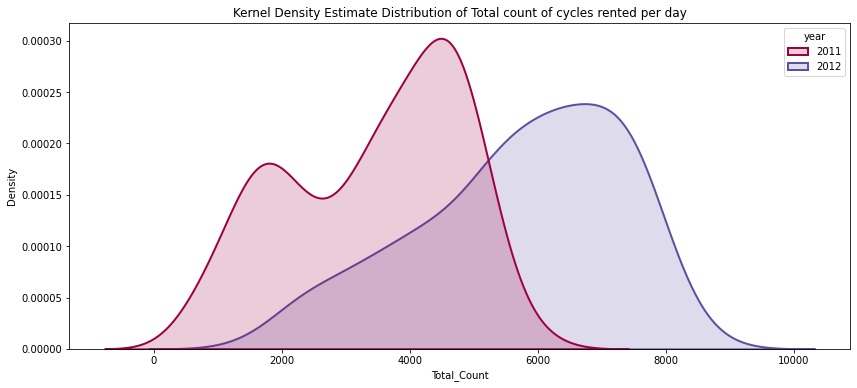

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(data=modf_yulu, x="Total_Count", hue="year", fill=True, common_norm=False, palette='Spectral', alpha=.2, linewidth=2)
plt.title("Kernel Density Estimate Distribution of Total count of cycles rented per day")
plt.show()

<Figure size 1008x432 with 0 Axes>

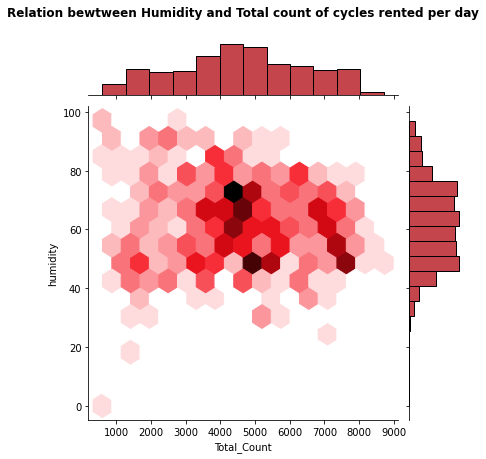

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="ticks")
sns.jointplot(x=modf_yulu['Total_Count'], y=modf_yulu['humidity'], kind="hex", color="#b20710")
plt.title("Relation bewtween Humidity and Total count of cycles rented per day", loc = "center",pad= 90,fontweight="bold")
plt.show()

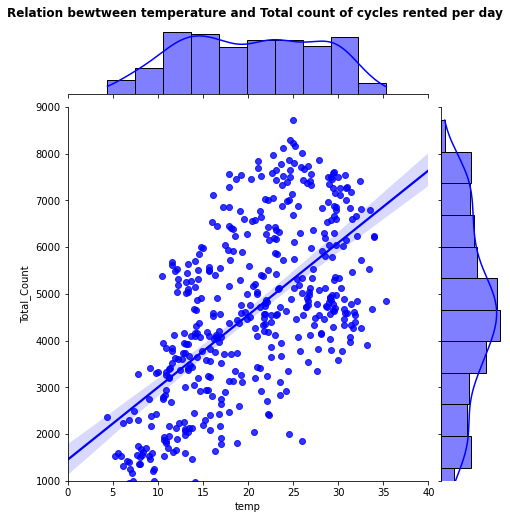

In [ ]:
g = sns.jointplot(x="temp", y="Total_Count", data=modf_yulu,
                  kind="reg", truncate=False,
                  xlim=(0,40), ylim=(1000, 9000),
                  color="b", height=7)
plt.title('Relation bewtween temperature and Total count of cycles rented per day', loc = "right",pad= 90,fontweight="bold")
plt.show()

# ***Inferences***

---

1. **Season**: Season 3 sees the highest amount of cycles rented, followed by 2, 4 and 1.
2. **weather**: Users mostly rent cycle during weather 1, followed by 2 and 3. Weather 4 was recorded only once in the period of 2 years.
3. **temp**: Temperature is highest in Season 3, which is the season when most cycles are rented.
4. **Humidity**: Humidity is highest in season 3, which is the season when most cycles are rented.
4. **Windspeed**: Windspeed is lowest in season 3, which is the season when most cycles are rented.

5. **Count**:
 * Count of Rented cycles are lower at lower and higher temperatures and maximizes around the average temperature range  **15 degrees and 27 degrees**.
 * Count of rented Cycle are highest around **humidity levels of 40 to 80**. beyond those values, count of rented cycles drop.
 * The daily count of rented cycles have **increased from year 2011 to 2012**.
 * Cycles are rented less at temperatures lower than 10 degrees and rises with rise of temperature and again starts falling as temperature reaches 30 degrees.
 * Cycles rented count are significantly lower for the first 3 months of both years, starts increasing from **months 4 to 10**, and falls again at months 11 and 12.

 * **Tuesdays and Fridays** are the days when the most cycles are rented. on Sundays, the least number of cycles are rented.
 * Gross Cycle rents maximizes at season 3 followed by Season 2.
 * In a day, cycles are mostly rented around **5pm and 6pm**, wheras cycles are least rented around 3am and 4am.

4. **Casual**: Count of casual cycles rented falls during the weekdays and maximizes on weekends.
5. **Registered**: Count of registered cycles rented maximizes during weekdays and falls in number on weekends.

***3. Multivariate Analysis***

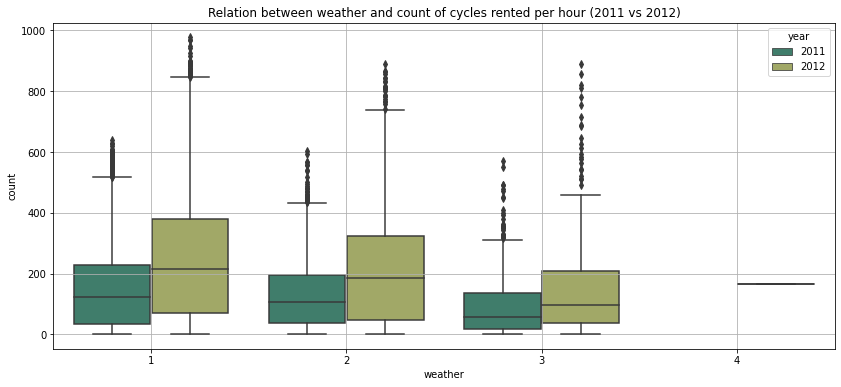

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=yulu, x='weather', y= 'count', hue='year',palette='gist_earth')
plt.title("Relation between weather and count of cycles rented per hour (2011 vs 2012)")
plt.grid()
plt.show()

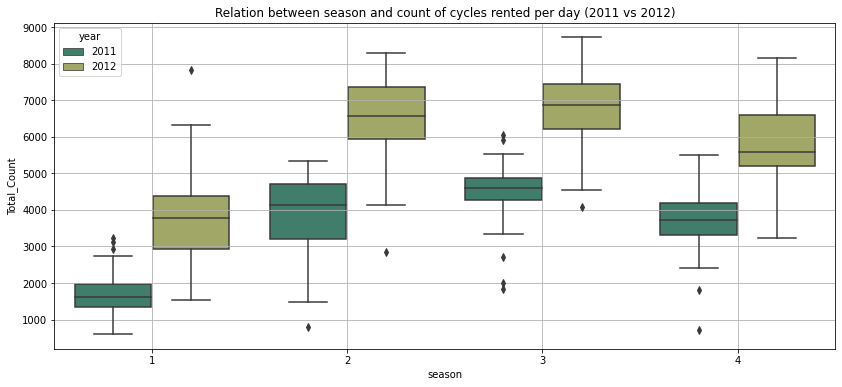

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='season', y= 'Total_Count', hue='year', palette='gist_earth')
plt.title("Relation between season and count of cycles rented per day (2011 vs 2012)")
plt.grid()
plt.show()

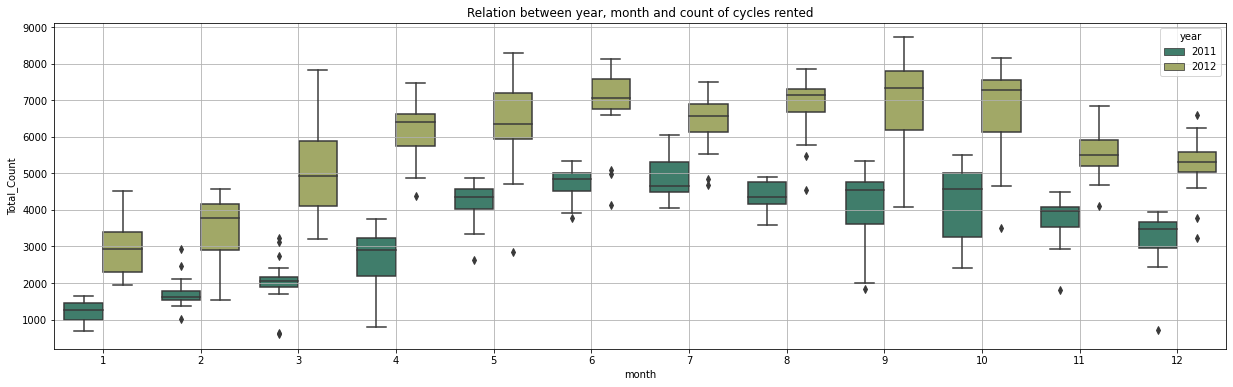

In [ ]:
plt.figure(figsize = (21,6))
sns.boxplot(data=modf_yulu, x='month', y= 'Total_Count', hue='year', palette='gist_earth')
plt.title("Relation between year, month and count of cycles rented")
plt.grid()
plt.show()

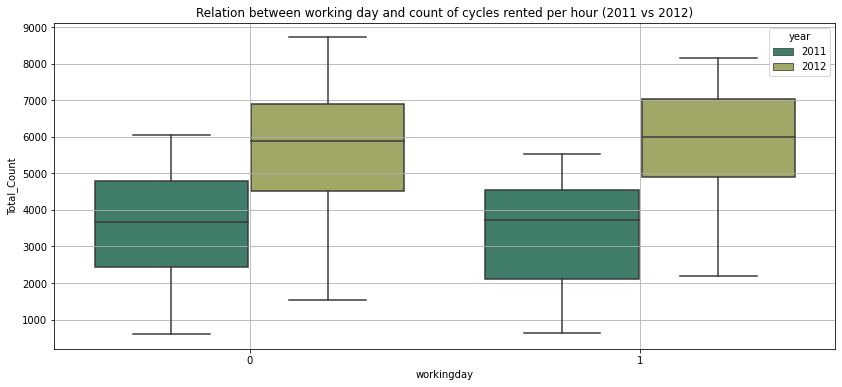

In [ ]:
plt.figure(figsize = (14,6))
sns.boxplot(data=modf_yulu, x='workingday', y= 'Total_Count', hue='year',palette='gist_earth')
plt.title("Relation between working day and count of cycles rented per hour (2011 vs 2012)")
plt.grid()
plt.show()

<Figure size 1008x432 with 0 Axes>

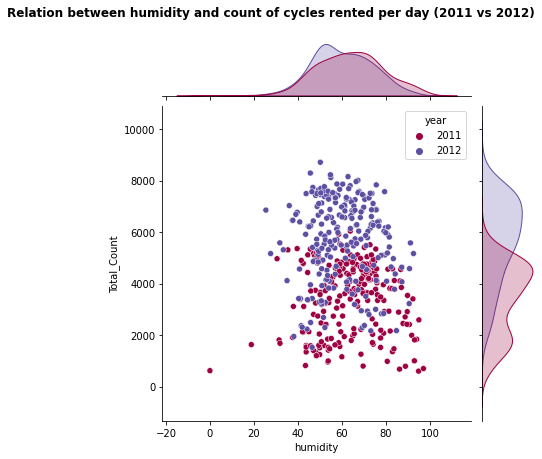

In [ ]:
plt.figure(figsize = (14,6))
# sns.set_theme(style="white")
sns.jointplot(data=modf_yulu, x="humidity", y="Total_Count", hue="year", palette='Spectral' )
plt.title('Relation between humidity and count of cycles rented per day (2011 vs 2012)', loc = "right",pad= 90,fontweight="bold")
plt.show()

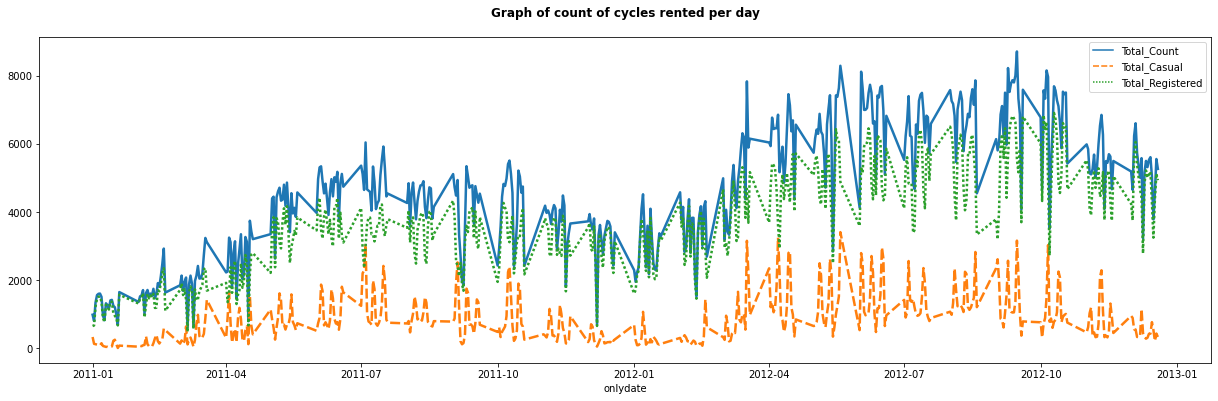

In [ ]:
data = pd.DataFrame({'onlydate':modf_yulu['onlydate'], 'Total_Count': modf_yulu['Total_Count']	, 'Total_Casual': modf_yulu['Total_Casual'], 'Total_Registered': modf_yulu['Total_Registered'] })
data = data.set_index('onlydate')
plt.figure(figsize = (21,6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.title('Graph of count of cycles rented per day', loc = "center",pad= 20,fontweight="bold")
plt.show()

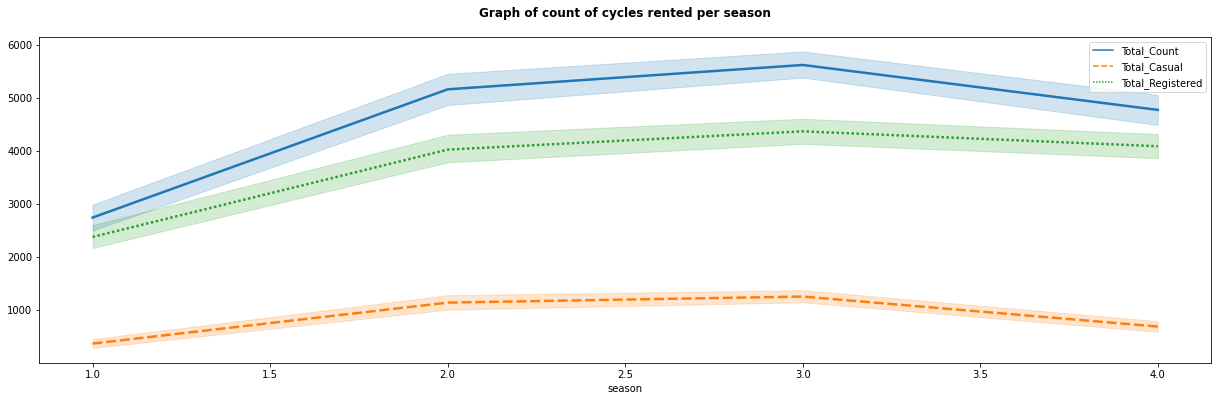

In [ ]:
data = pd.DataFrame({'season':modf_yulu['season'], 'Total_Count': modf_yulu['Total_Count']	, 'Total_Casual': modf_yulu['Total_Casual'], 'Total_Registered': modf_yulu['Total_Registered'] })
data = data.set_index('season')
plt.figure(figsize = (21,6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
plt.title('Graph of count of cycles rented per season', loc = "center",pad= 20,fontweight="bold")
plt.show()

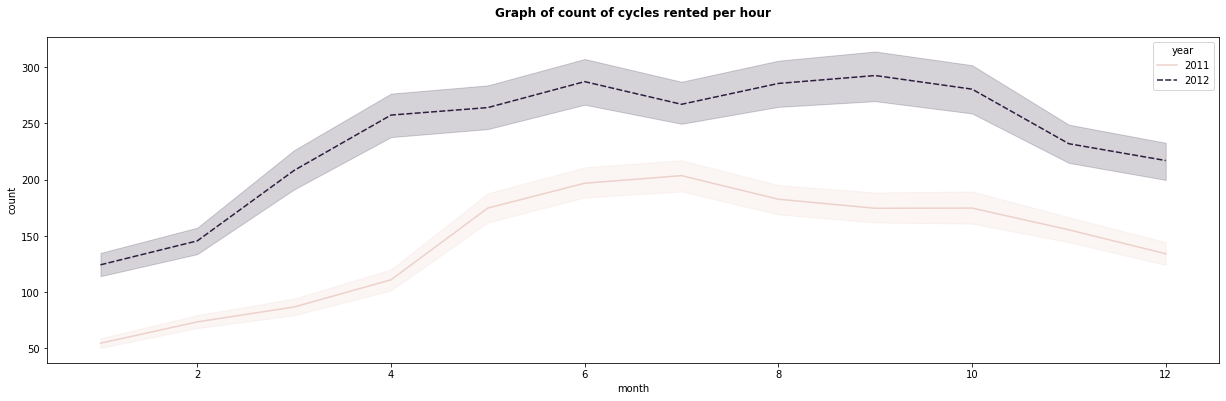

In [ ]:
plt.figure(figsize = (21,6))
sns.lineplot(data=yulu, x="month", y="count", hue="year", style="year")
plt.title('Graph of count of cycles rented per hour', loc = "center",pad= 20,fontweight="bold")
plt.show()

<Figure size 1512x1512 with 0 Axes>

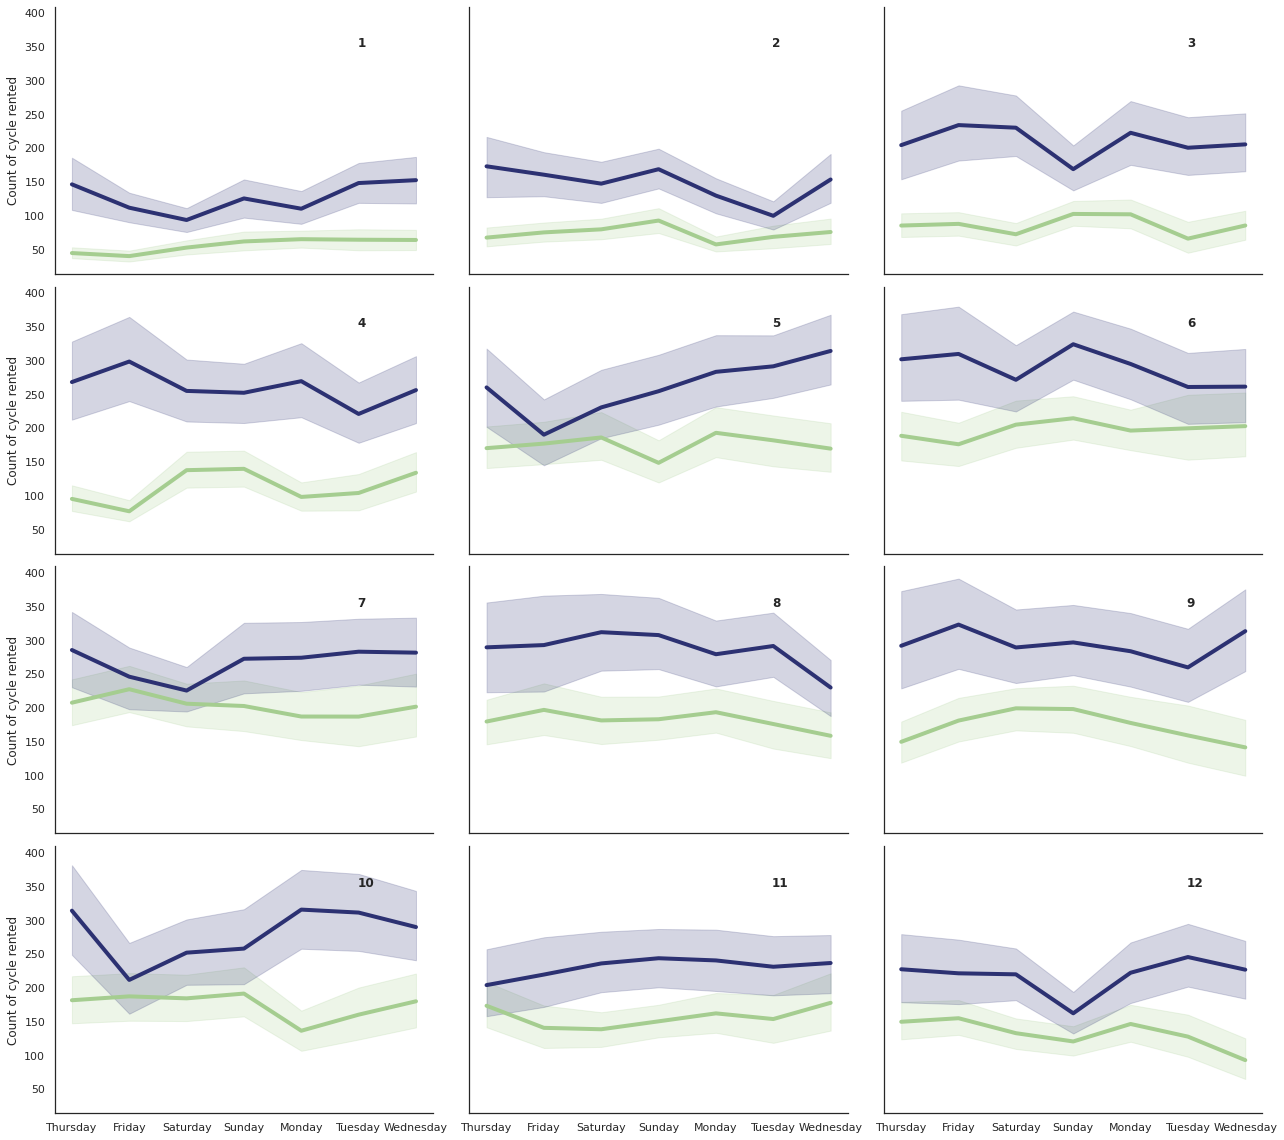

In [ ]:
plt.figure(figsize = (21,21))
sns.set_theme(style="white")
g = sns.relplot(
    data=yulu,
    x="day", y="count", col="month", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=4, aspect=1.5, legend=False,
)
for month, ax in g.axes_dict.items():
    ax.text(.8, .85, month, transform=ax.transAxes, fontweight="bold")
g.set_titles("")
g.set_axis_labels("", "Count of cycle rented")
g.tight_layout()
# plt.title('Graph of count of cycles rented each month in 2011 and 2012')
plt.show()

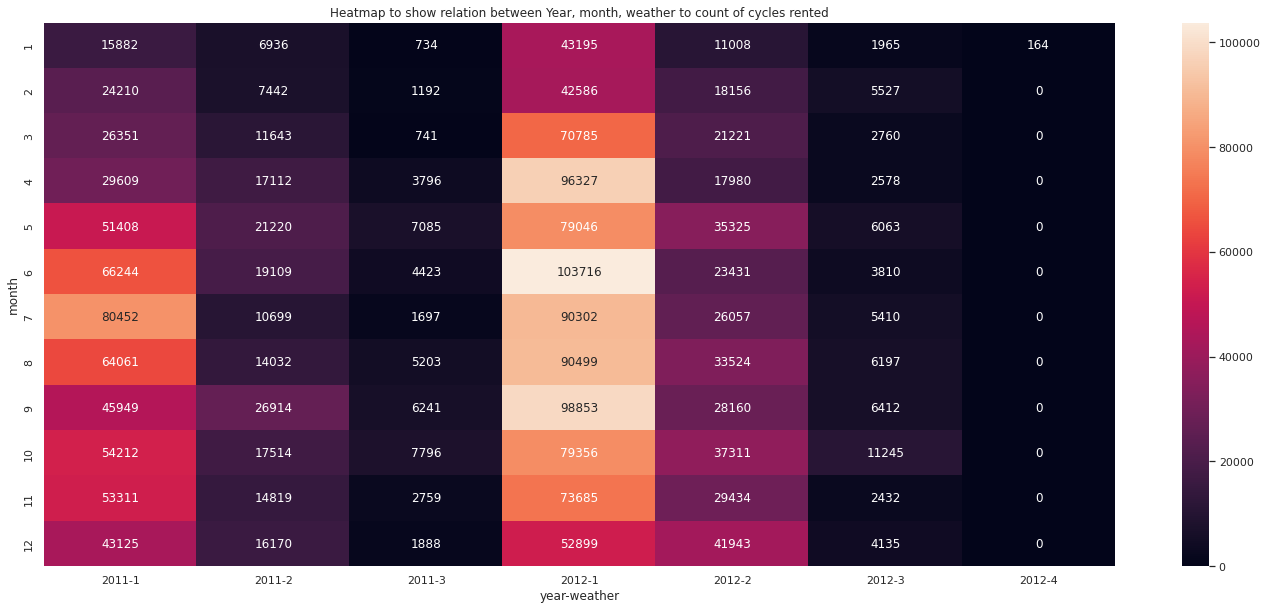

In [ ]:
ymw_count=yulu.groupby(['year','month','weather'])['count'].sum()
data= ymw_count.unstack(level=[0,2])
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(24,10))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, month, weather to count of cycles rented')
plt.show()

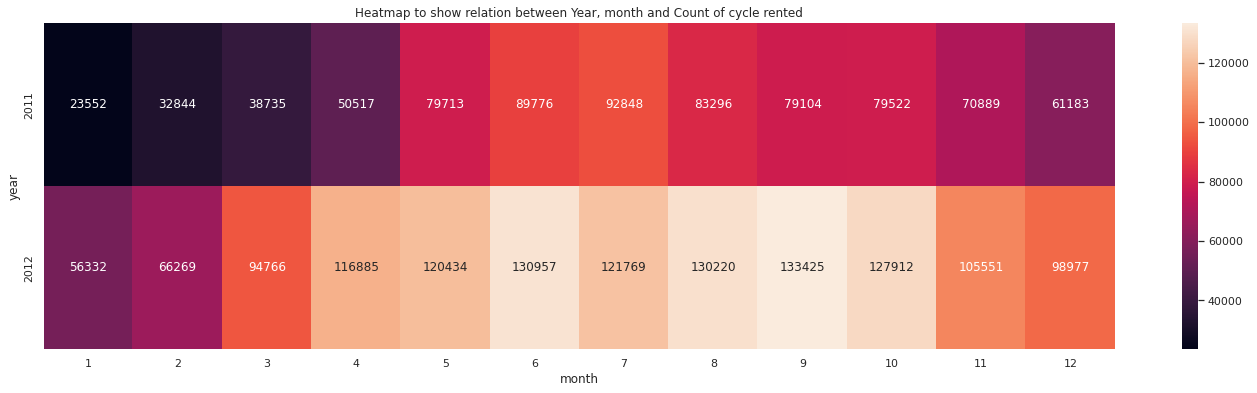

In [ ]:
ym_count=yulu.groupby(['year','month'])['count'].sum()
data= ym_count.unstack(level=[1])
plt.figure(figsize=(24,6))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, month and Count of cycle rented')
plt.show()

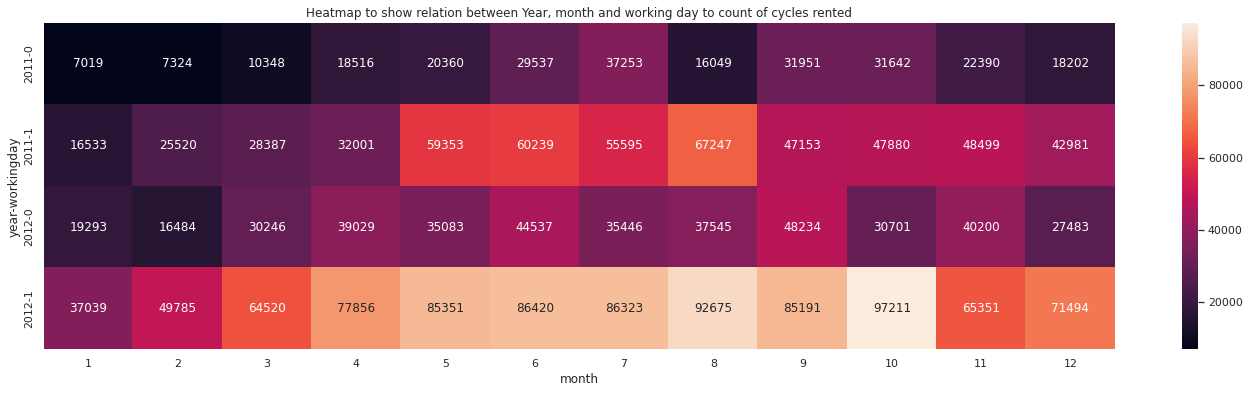

In [ ]:
ymw_count=yulu.groupby(['year','month','workingday'])['count'].sum()
data=ymw_count.unstack(level=1)
plt.figure(figsize=(24,6))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, month and working day to count of cycles rented')
plt.show()

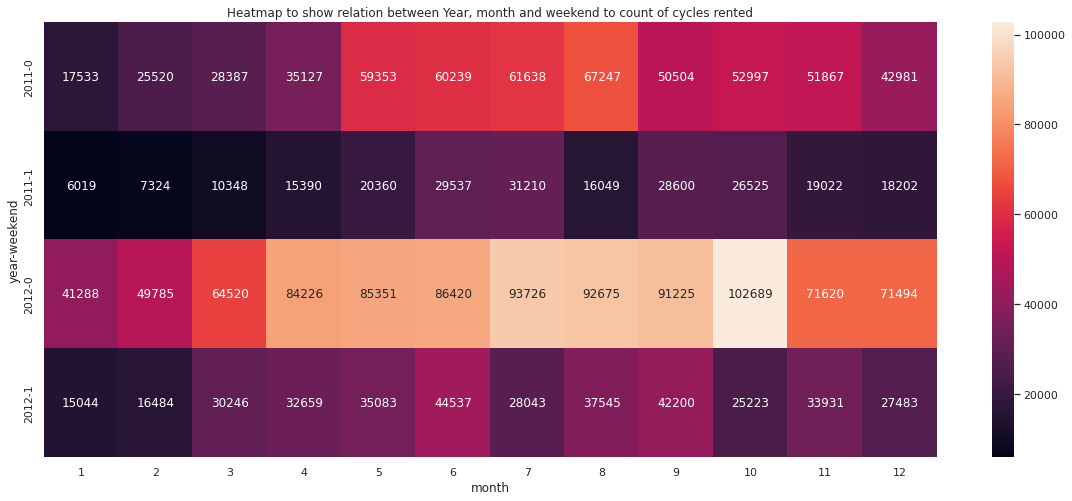

In [ ]:
ymwk_count=yulu.groupby(['year','month','weekend'])['count'].sum()
data=ymwk_count.unstack(level=1)
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(data=data, annot=True, fmt ='.6g')
plt.title('Heatmap to show relation between Year, month and weekend to count of cycles rented')
plt.show()

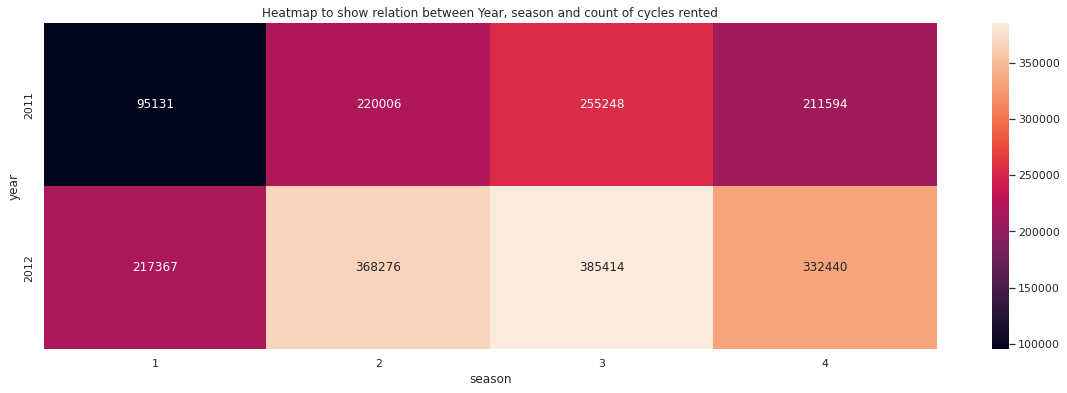

In [ ]:
ys_count=yulu.groupby(['year','season'])['count'].sum()
data= ys_count.unstack(level=[1])
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(20,6))
sns.heatmap(data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, season and count of cycles rented')
plt.show()

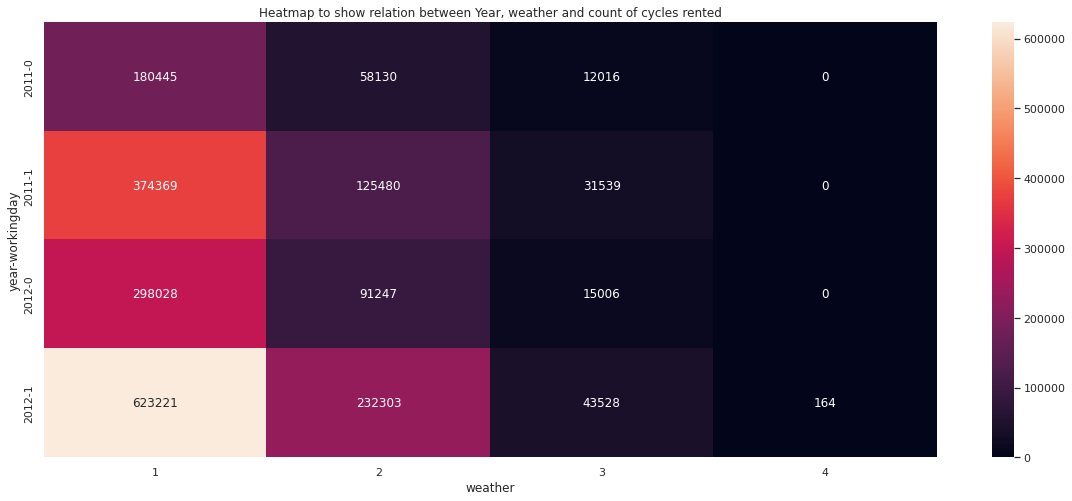

In [ ]:
yww_count=yulu.groupby(['year','weather','workingday'])['count'].sum()
data=yww_count.unstack(level=1)
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(data=data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, weather and count of cycles rented')
plt.show()

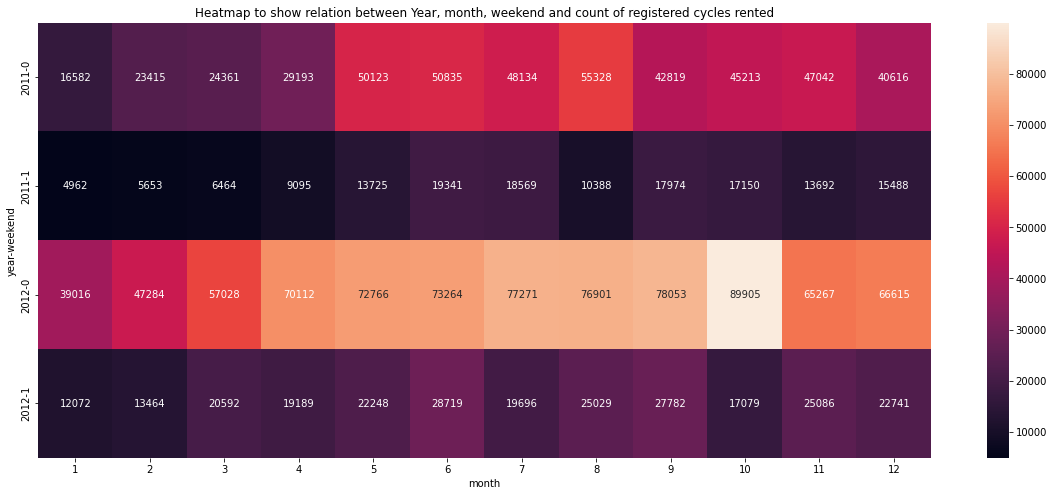

In [ ]:
ymw=yulu.groupby(['year','month','weekend'])['registered'].sum()
data= ymw.unstack(level=1)
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(data=data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, month, weekend and count of registered cycles rented')
plt.show()

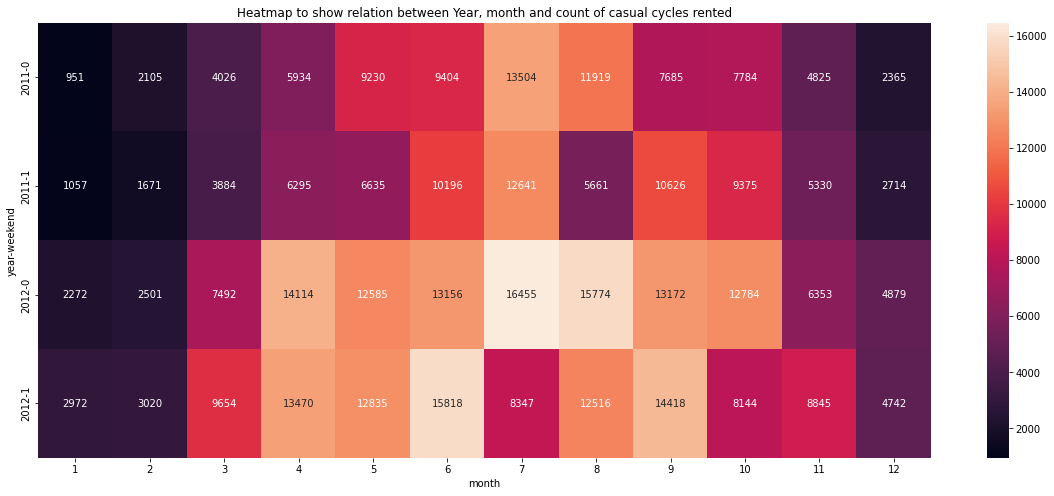

In [ ]:
ymw=yulu.groupby(['year','month','weekend'])['casual'].sum()
data= ymw.unstack(level=1)
data.replace(np.nan,0, inplace=True)
plt.figure(figsize=(20,8))
sns.heatmap(data=data, annot=True, fmt='.6g')
plt.title('Heatmap to show relation between Year, month and count of casual cycles rented')
plt.show()

# ***Inferences***

---

1. **Season**: Out of the 2 years, season 1 of year 2011, showed the least gross cycle rented.
2. **weather**: Users mostly rent cycle during weather 1, followed by 2. Users renting bikes in Weather 3 and 4 are comparitively very less in number, even though this number improved from 2011 to 2012.
3. **Atemp**: 	With lower temperature count of registered cycles are less. With increasing temperature the number of cycle rent count increases uptill 35 degree celsius.
7. **Count**: 
  * Out of the 24 months, the count of total rented bikes is highest in **month 9 of year 2012** and lowest in month 1 of 2011.
  * **Season 3** shows maximum count of rented bikes per hour.
  * **Weather 1** shows the maximum count of rented bikes.
8. **Count of registered Bikes**: Count of registered bikes over weekend are less as compared to count of casual bikes.
9. **Count of Casual Bikes**: Count of casual bikes over weekend are much higher in number than on working days.

# ***OUTLIER TREATMENT***

---



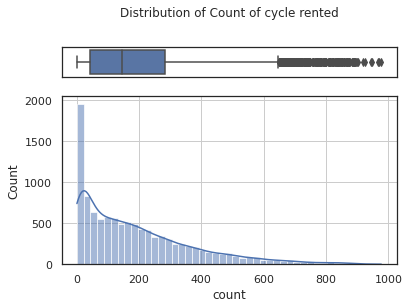

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=yulu,x='count', ax=ax_box)
sns.histplot(data=yulu, x="count", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.title('Distribution of Count of cycle rented', pad=80)
plt.grid()
plt.show()

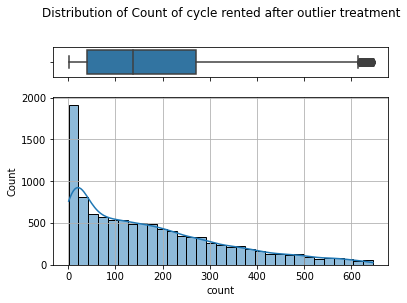

In [7]:
Q3 = yulu['count'].quantile(0.75)
Q1 = yulu['count'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
outlier_treated_yulu = yulu[(yulu['count']>lower) & (yulu['count']<upper)]
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=outlier_treated_yulu,x='count', ax=ax_box)
sns.histplot(data=outlier_treated_yulu, x="count", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.title('Distribution of Count of cycle rented after outlier treatment', pad=80)
plt.grid()
plt.show()

# ***Inferences***

---

1. We can see that there are outliers in our data in the count (count of cycles rented) variable, which means there are hours where very high number of bikes were rented which vary significantly from the other observations.
2. Outliers affect our data analysis while finding distribution types or even confidence intervals. So, we will performed modifications to the data to remove outliers.
3. After performing, we can see the number of data points identified as outliers are very low.

# ***CLT and Confidence Intervals***

---


A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if we want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels result in a wider confidence intervals.

The means of the samples in a set of samples (the sample means) will be approximately normally distributed. This normal distribution will have a mean close to the mean of the population.

The variance of the sample means will be close to the variance of the population divided by the sample size.

***A) Confidence interval mean of the number of Cycles rented per SEASON.***

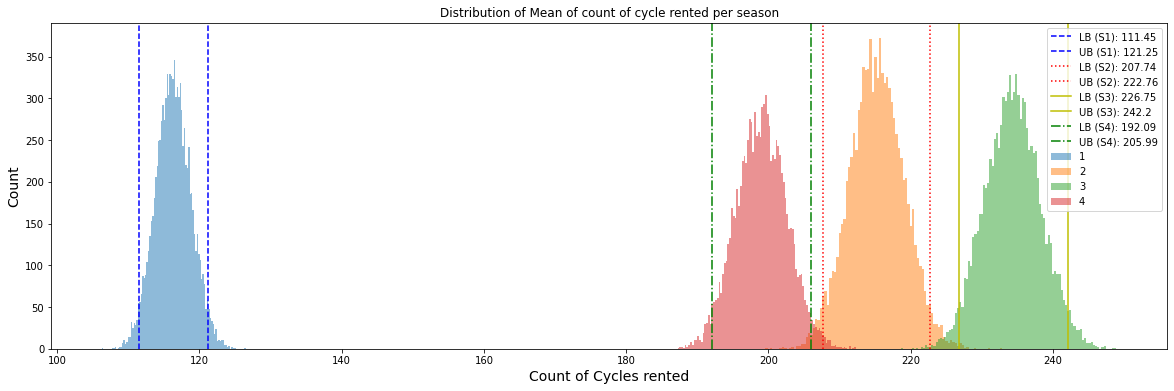

In [ ]:
plt.figure(figsize = (20,6))
u_season= yulu['season'].unique()
style = ['--', ':', '-', '-.']
color = ['b', 'r','y','g']
for k in range(len(u_season)):
  r = 10000
  data = yulu[(yulu["season"] == u_season[k])] ["count"]
  size = 2500
  bs_means = np.empty(r)
  for i in range(r):
      bs_sample = np.random.choice(data, size=size)
      bs_means[i] = np.mean(bs_sample)
  plt.hist(bs_means, bins=100, alpha=0.5 ,label= u_season[k])
  plt.axvline(x = round(np.percentile(bs_means,2.5), 2), color = color[k], linestyle= style[k], label = f"LB (S{u_season[k]}): {round(np.percentile(bs_means,2.5), 2)}")
  plt.axvline(x = round(np.percentile(bs_means,97.5), 2), color = color[k], linestyle= style[k], label =f"UB (S{u_season[k]}): {round(np.percentile(bs_means,97.5), 2)}")
  plt.xlabel("Count of Cycles rented", size=14)
  plt.ylabel("Count", size=14)
  plt.title(f"Distribution of Mean of count of cycle rented per season")
  plt.legend(loc='upper right')
  plt.grid()

***Inference:***

---
As, indicated by the plot above, the mean count of bikes rented on an hourly basis in **season 3 is greatest**, followed by season 2, 4 and **least in season 1**. **The 95% CI for bike count in season 1 is [111-121], in season 2 is [207-222], in season 3 is [226-242] and in season 4 is [192-205].**



***B) Confidence interval mean of the number of Cycles rented per WEATHER.***

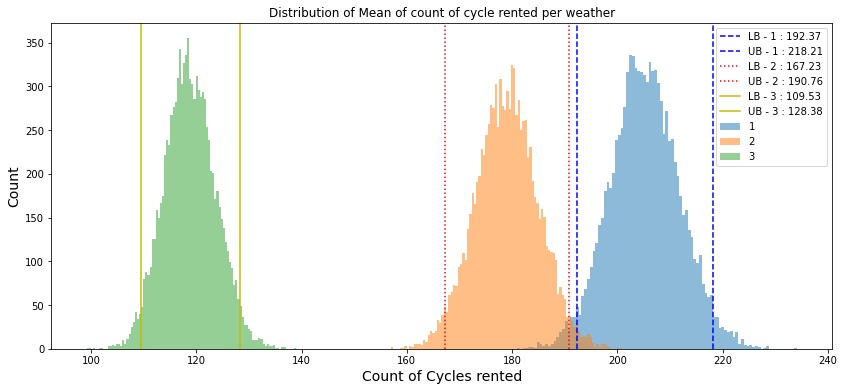

In [ ]:
yulu_m = yulu[yulu['weather']!=4]
plt.figure(figsize = (14,6))
u_citycat= yulu_m['weather'].unique()
style = ['--', ':', '-']
color = ['b', 'r','y']
for k in range(len(u_citycat)):
  r = 10000
  data = yulu_m[(yulu_m["weather"] == u_citycat[k])] ["count"]
  size = 800
  bs_means = np.empty(r)
  for i in range(r):
      bs_sample = np.random.choice(data, size=size)
      bs_means[i] = np.mean(bs_sample)
  plt.hist(bs_means, bins=100, alpha=0.5 ,label= u_citycat[k])
  plt.axvline(x = round(np.percentile(bs_means,2.5), 2), color = color[k], linestyle= style[k], label = f"LB - {u_citycat[k]} : {round(np.percentile(bs_means,2.5), 2)}")
  plt.axvline(x = round(np.percentile(bs_means,97.5), 2), color = color[k], linestyle= style[k], label = f"UB - {u_citycat[k]} : {round(np.percentile(bs_means,97.5), 2)}")
  plt.xlabel("Count of Cycles rented", size=14)
  plt.ylabel("Count", size=14)
  plt.title(f"Distribution of Mean of count of cycle rented per weather")
  plt.legend(loc='upper right')

***Inference:***

---
As, indicated by the plot above, the mean count of bikes rented on an hourly basis in **weather 1 is greatest**, followed by weather 2 and **least in weather 3**. **The 95% CI for bike count in weather 1 is [192-218], in weather 2 is [167-190] and in weather 3 is [109-128].**


***C) Confidence interval mean of the number of Cycles rented Working Day vs NonWorking Day.***

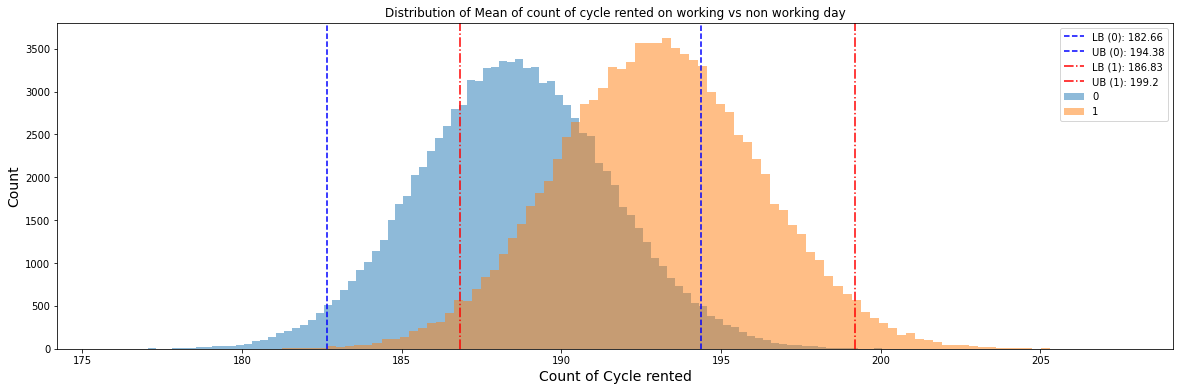

In [ ]:
plt.figure(figsize = (20,6))
u_workingday= yulu['workingday'].unique()
style = ['--','-.']
color = ['b', 'r']
for k in range(len(u_workingday)):
  r = 100000
  data = yulu[(yulu["workingday"] == u_workingday[k])]["count"]
  size = 3400
  bs_means = np.empty(r)
  for i in range(r):
      bs_sample = np.random.choice(data, size=size)
      bs_means[i] = np.mean(bs_sample)
  plt.hist(bs_means, bins=100, alpha=0.5 ,label= u_workingday[k])
  plt.axvline(x = round(np.percentile(bs_means,2.5), 2), color = color[k], linestyle= style[k], label = f"LB ({u_workingday[k]}): {round(np.percentile(bs_means,2.5), 2)}")
  plt.axvline(x = round(np.percentile(bs_means,97.5), 2), color = color[k], linestyle= style[k], label =f"UB ({u_workingday[k]}): {round(np.percentile(bs_means,97.5), 2)}")
  plt.xlabel("Count of Cycle rented", size=14)
  plt.ylabel("Count", size=14)
  plt.title(f"Distribution of Mean of count of cycle rented on working vs non working day")
  plt.legend(loc='upper right')
  plt.grid()

***Inference:***

---



As, indicated by the plot above, the mean count of bikes rented on an hourly basis is higher for working days and tends to be lower for non-working days. but the confidence intervals are somewhat overlapping. **The 95% CI for bike count in working day is [186-199] and in non working day is [182-194].**

**D) Confidence interval mean of the number of Cycles rented in different times of day.**

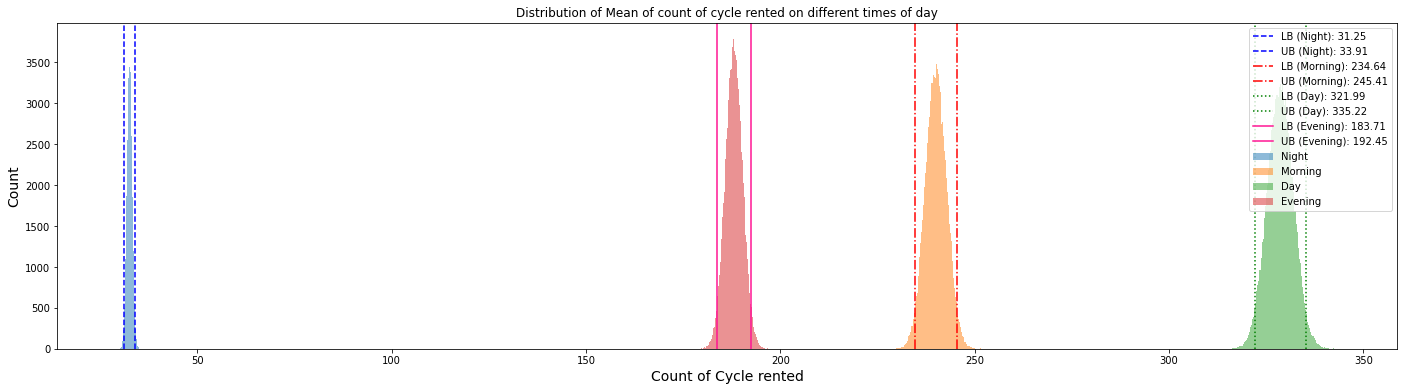

In [ ]:
import datetime as dt
yulu_copy=yulu.copy()
# yulu_copy['time'] = yulu_copy['time'].astype(str).apply(lambda x: x[:2]).astype(int)
bins = [-1,6,12,18,24]
labels =["Night", "Morning", "Day", "Evening"]
yulu_copy['time_catg'] = pd.cut(yulu_copy['time'], bins,labels=labels)

plt.figure(figsize = (24,6))
u_tc= yulu_copy['time_catg'].unique()
style = ['--','-.', ':', '-']
color = ['b', 'r','g', 'deeppink']
for k in range(len(u_tc)):
  r = 100000
  data = yulu_copy[(yulu_copy["time_catg"] == u_tc[k])]["count"]
  size = 3400
  bs_means = np.empty(r)
  for i in range(r):
      bs_sample = np.random.choice(data, size=size)
      bs_means[i] = np.mean(bs_sample)
  plt.hist(bs_means, bins=100, alpha=0.5 ,label= u_tc[k])
  plt.axvline(x = round(np.percentile(bs_means,2.5), 2), color = color[k], linestyle= style[k], label = f"LB ({u_tc[k]}): {round(np.percentile(bs_means,2.5), 2)}")
  plt.axvline(x = round(np.percentile(bs_means,97.5), 2), color = color[k], linestyle= style[k], label =f"UB ({u_tc[k]}): {round(np.percentile(bs_means,97.5), 2)}")
  plt.xlabel("Count of Cycle rented", size=14)
  plt.ylabel("Count", size=14)
  plt.title(f"Distribution of Mean of count of cycle rented on different times of day")
  plt.legend(loc='upper right')
  plt.grid()

***Inference***

---

As, indicated by the plot above, the mean count of bikes rented on an hourly basis is **higher during the day (12pm - 6pm)**, followed by morning (6am - 12pm), then evening (6pm - 12pm) and then **least at** **night (12pm - 6am)**. **The 95% CI for bike count in morning is [234 - 245] and during day is [321 - 335] and during evening is [183-192] and during night is [31 - 34].**

# ***Hypothesis Testing***

---

Setting up a function to return result on the basis of the significance value(0.05).

In [ ]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS') 

# ***Question -1 : Working Day has effect on number of electric cycles rented or not? Using 2- Sample T-Test***

---
Mathematically, the t-test takes a sample from each of the two sets and establishes the problem statement. It assumes a null hypothesis that the two means are equal.

Using the formulas, values are calculated and compared against the standard values. The assumed null hypothesis is accepted or rejected accordingly. If the null hypothesis qualifies to be rejected, it indicates that data readings are strong and are probably not due to chance.
The correlated t-test, or paired t-test, is a dependent type of test and is performed when the samples consist of matched pairs of similar units, or when there are cases of repeated measures. For example, there may be instances where the same patients are repeatedly tested before and after receiving a particular treatment. Each patient is being used as a control sample against themselves.

This method also applies to cases where the samples are related or have matching characteristics, like a comparative analysis involving children, parents, or siblings.

​



***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - number of electric cycles rented on working days and non working days are same.

  * **Alternate Hypothesis ( HA )** - number of electric cycles rented on 
working days and non working days are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**

* Homogeneity of Variances using **Lavene's test**

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
* We know that the test statistic while performing a T-Test follows Tdistribution.


***STEP-4***: Decide the kind of test.

---


* We will be performing **Two tailed t-test**

***STEP-5***: Compute the p-value and fix value of alpha.

---
* we will be com puting the t-test value using the ttest function using scipy.stats.
* We set our ***alpha to be 0.05***

***STEP-6***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0




A) ***QQ-Plot for Distribution check.***

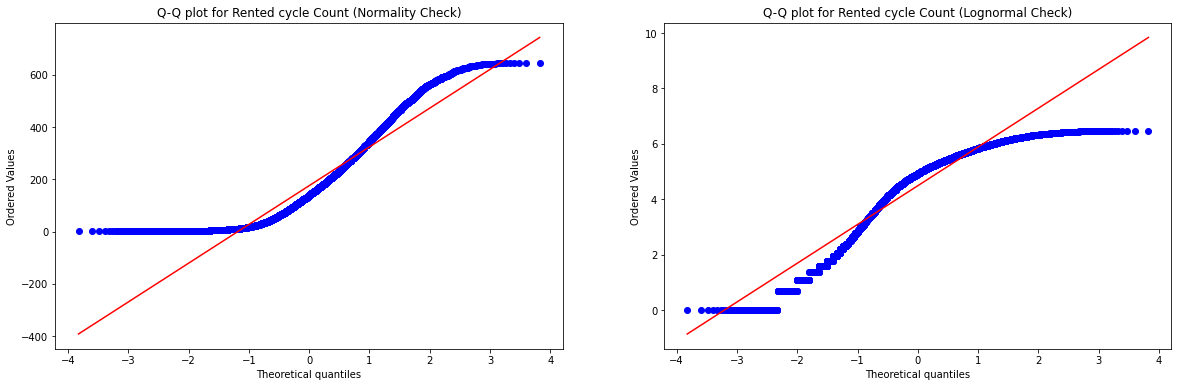

In [8]:
import scipy.stats as stats
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
stats.probplot(outlier_treated_yulu['count'], plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(1,2,2)
stats.probplot(outlier_treated_yulu['count'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.show()

The graph doesnt look like a normal gaussian distribution. it doesnt also satisfy the QQ - Plots. 

We know, the ***count*** random variable, is actually count of the number of cycles rented in an hourly basis. 

we also know, that the **Poisson distribution** is a discrete probability distribution that expresses the probability of a given number of ***events occurring in a fixed interval of tim***e or space if these events occur with a known constant mean rate and independently of the time since the last event.

So, we will go and try doing a Poisson distribution check.

Also, we need to keep in mind, there are a lot of factors, that would affect the Count variable, like weather, time of day, temperature, working day or not, season, etc.

so, intutively we can assume that, if we look at data for a particular kind of time, like if we consider only working days, the count variable might be poisson distributed. let's go ahead and check it.

In [ ]:
import datetime as dt
d1 = dt.datetime(2012, 4, 1, 11, 00, 00) 
d2 = dt.datetime(2012, 6, 30, 15, 00, 00)

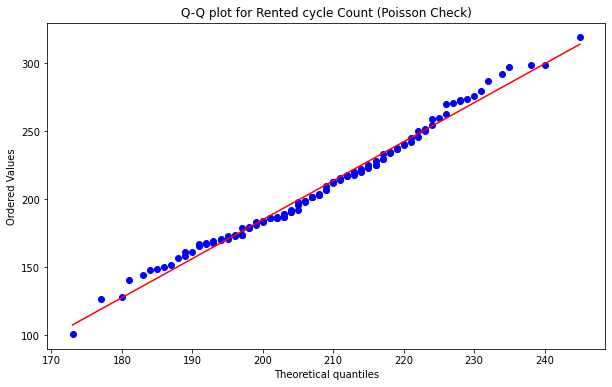

In [ ]:
set1 = yulu[(yulu['season']==2) & (yulu['workingday']==1) & (yulu['year']==2012) & (yulu['weather']==1) &  (yulu['time'] >= d1.time()) &  (yulu['time'] <= d2.time())]['registered']
plt.figure(figsize=(10,6))
stats.probplot(set1, dist='poisson', sparams=(set1.mean(),), plot=plt)
plt.title('Q-Q plot for Rented cycle Count (Poisson Check)')
plt.show()

This looks like a Poisson Distribution.

B) ***Homogeneity of Variances using Levene's test***

* Null Hypothesis(H0) - Homogenous Variance

* Alternate Hypothesis(HA) - Non Homogenous variance

In [4]:
from scipy.stats import levene
workingday = yulu[yulu['workingday']==1]['count']
nonworkingday = yulu[yulu['workingday']==0]['count']
stat,p = levene(workingday,nonworkingday)

In [ ]:
print('P-value :',p)

P-value : 0.9437823280916695


In [ ]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


**We fail to reject null hypothesis, which means variance is same/similar.**

C) ***Performing two tailed t-test:***

In [ ]:
workingday = yulu[yulu['workingday']==1]['count']
nonworkingday = yulu[yulu['workingday']==0]['count']

In [9]:
st,p = stats.ttest_ind(workingday,nonworkingday)
print('P-value :',(p))

P-value : 0.22644804226361348


In [ ]:
htResult(p)

Fail to Reject NULL HYPOTHESIS


# **Answer:**
We fail to reject null hypothesis, which means the number of electric cycles rented on working days and non working days are similar.



# ***Question 2: Number of cycles rented:- are the numbers similar or different in different seasons? - ANOVA test***

---

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other. 

Specifically, it tests the null hypothesis (H0):

***µ1 = µ2 = µ3 = ..... = µk***


where, µ = group mean and k = number of groups. 

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4 are same.

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
1. **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

2. Homogeneity of Variances using **Lavene's test**
3. Each observations are **independent**.

***STEP-3***: Define Test statistics; Distribution of T under H0.

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different. 

**F=MSR/MSE**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed t-test**

***STEP-5***: Compute the p-value and fix value of alpha.

---

we will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.
p-val > alpha : Accept H0
p-val < alpha : Reject H0

A) ***Normality Check using QQ-Plots***

In [ ]:
season1 = yulu[yulu['season']==1]['count']
season2 = yulu[yulu['season']==2]['count']
season3 = yulu[yulu['season']==3]['count']
season4 = yulu[yulu['season']==4]['count']


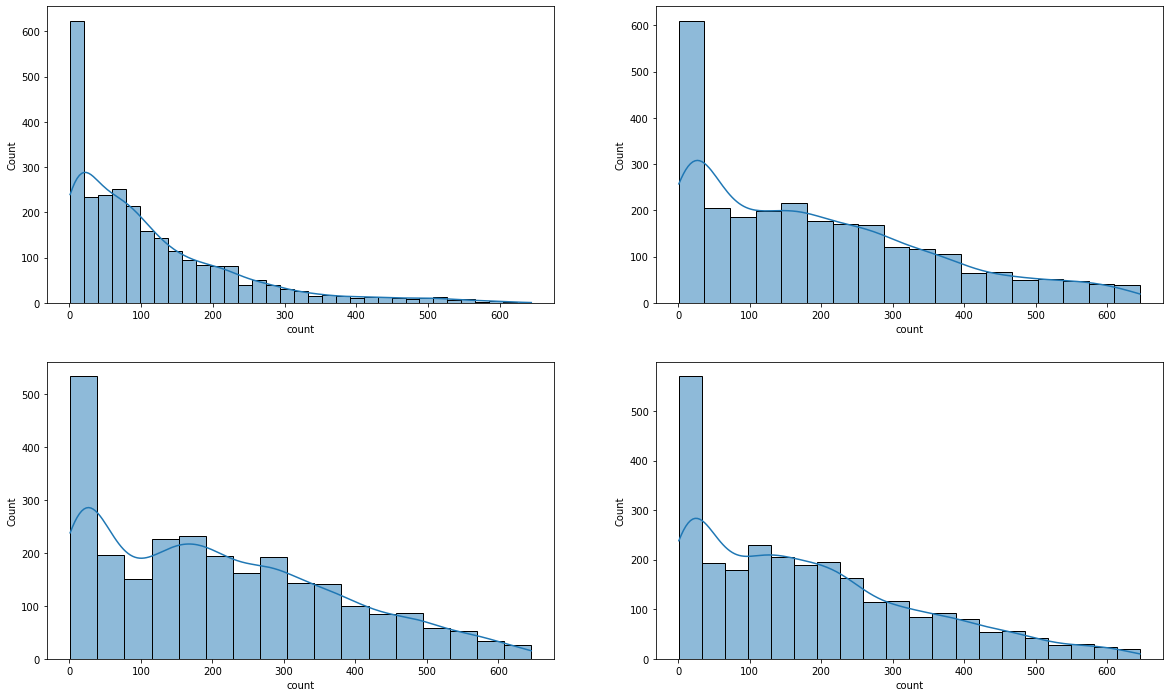

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=season1, kde=True)
plt.subplot(2,2,2)
sns.histplot(data=season2, kde=True)
plt.subplot(2,2,3)
sns.histplot(data=season3, kde=True)
plt.subplot(2,2,4)
sns.histplot(data=season4, kde=True)
plt.show()

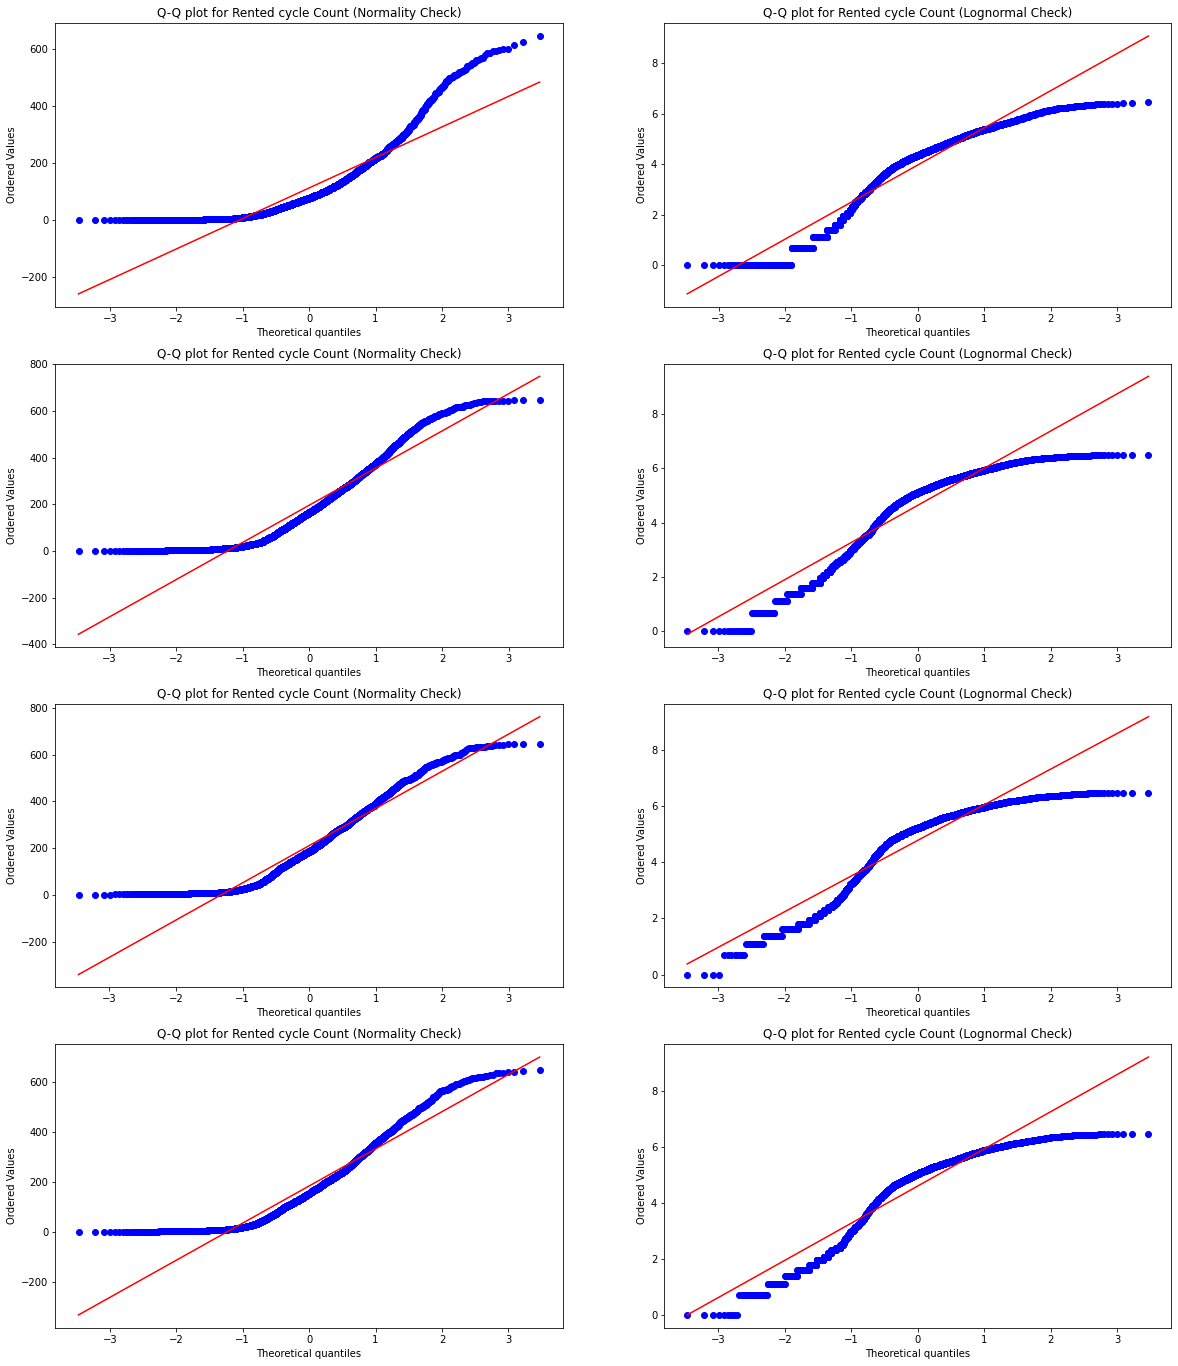

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(20,24))
plt.subplot(4,2,1)
stats.probplot(season1, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(4,2,2)
stats.probplot(season1.apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.subplot(4,2,3)
stats.probplot(season2, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(4,2,4)
stats.probplot(season2.apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.subplot(4,2,5)
stats.probplot(season3, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(4,2,6)
stats.probplot(season3.apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.subplot(4,2,7)
stats.probplot(season4, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(4,2,8)
stats.probplot(season4.apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Lognormal Check)')
plt.show()

The plots doesnt look like a normal gaussian distribution. it doesnt also satisfy the QQ - Plots.

We know, the **count** random variable, is actually count of the number of cycles rented in an hourly basis. We have seen pereviously that Count matches to **poisson distribution** to some extent.

But to perform ANOVA, we need our groups to be gaussian distributed. So, we will perform **BOX-COX transform** to change the distribution of these groups to normal.

B) ***BOX-COX Transform***

In [ ]:
season1= stats.boxcox(season1)[0]
season2= stats.boxcox(season2)[0]
season3= stats.boxcox(season3)[0]
season4= stats.boxcox(season4)[0]

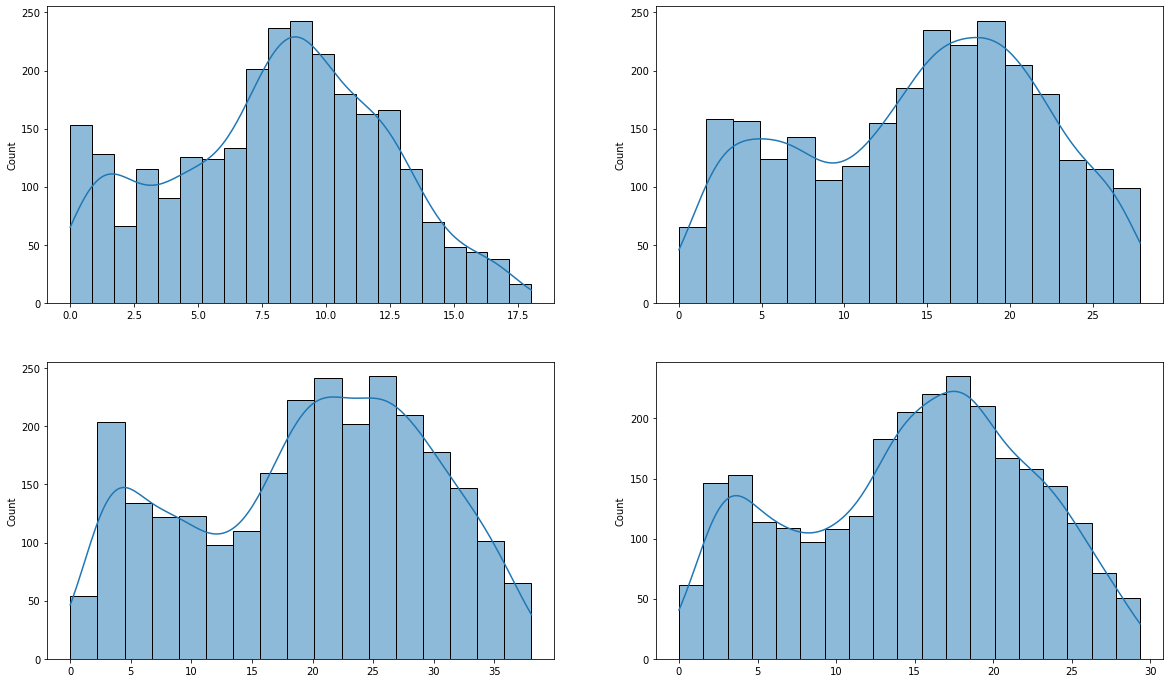

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=season1, kde=True)
plt.subplot(2,2,2)
sns.histplot(data=season2, kde=True)
plt.subplot(2,2,3)
sns.histplot(data=season3, kde=True)
plt.subplot(2,2,4)
sns.histplot(data=season4, kde=True)
plt.show()

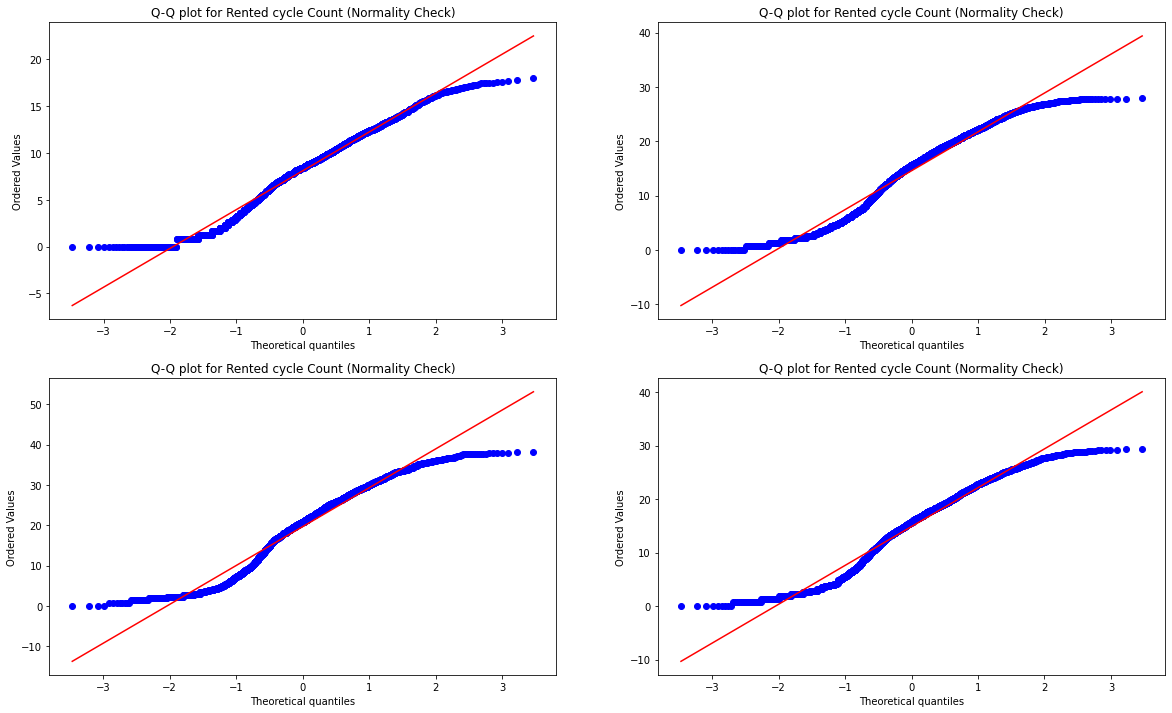

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
stats.probplot(season1, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(2,2,2)
stats.probplot(season2, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(2,2,3)
stats.probplot(season3, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(2,2,4)
stats.probplot(season4, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.show()

The plots tends to look like a normal gaussian distribution. it also paritally  satisfies the QQ - Plots for normality check.

C) ***Homogeneity of Variances using Levene's test***

1. Null Hypothesis(H0) - Homogenous Variance

2. Alternate Hypothesis(HA) - Non Homogenous variance

In [ ]:
stat,p = levene(season1,season2,season3,season4)
print('P-value :',p)

P-value : 2.132703669346175e-233


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


**We reject null hypothesis, which means the variance is not similar across all the groups. But, we will still go ahead and perform our one-way ANOVA**

# Performing One-Way Anova

In [ ]:
stat,p = stats.f_oneway(season1, season2, season3, season4)
print('P-value :',p)

P-value : 0.0


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


# ***Answer:***

---


***We reject null hypothesis, which means the number of electric cycles rented on different seasons are different.***

# ***Question-3: Number of cycles rented:- are the numbers similar or different for different weather? - ANOVA TEST***

---



***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. (* We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group.)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
Normality check using **QQ Plot**. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

Homogeneity of Variances using **Lavene's test**

Each observations are **independent**.

***STEP-3***: Define **Test statistics**; Distribution of T under H0.

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSR/MSE**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed t-test**

***STEP-5***: Compute the **p-value** and fix value of alpha.

---
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0. 
* **p-val > alpha** : Accept H0 
* **p-val < alpha** : Reject H0

In [ ]:
weather1 = yulu[yulu['weather']==1]['count']
weather2 = yulu[yulu['weather']==2]['count']
weather3 = yulu[yulu['weather']==3]['count']

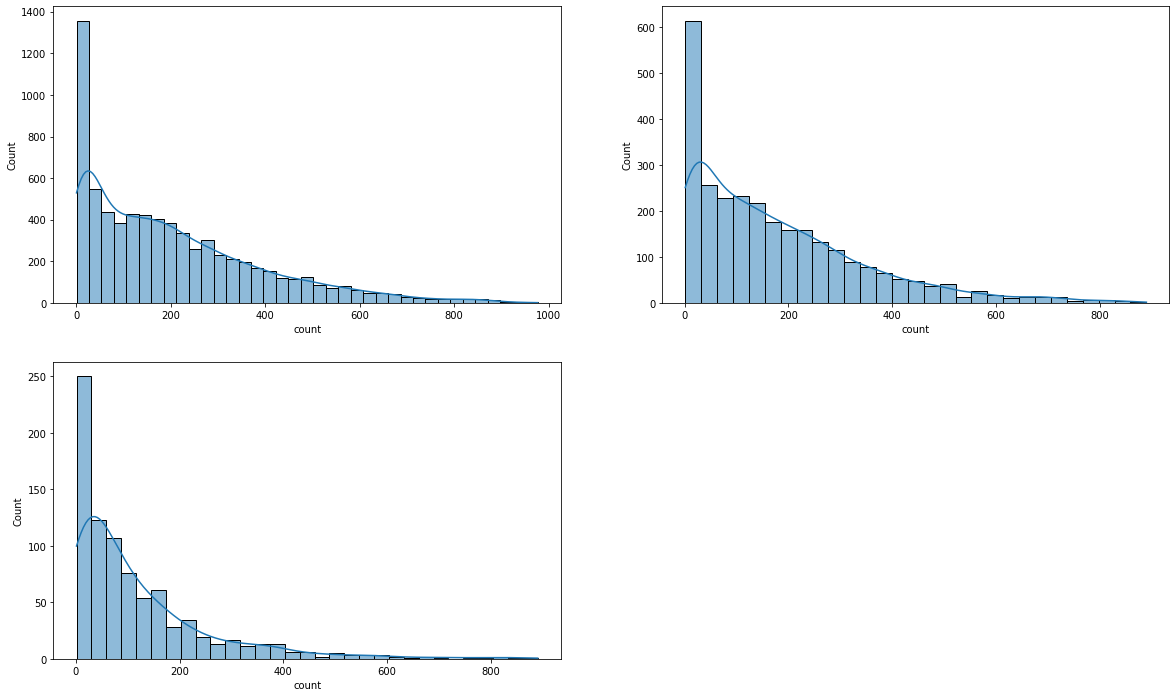

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=weather1, kde=True)
plt.subplot(2,2,2)
sns.histplot(data=weather2, kde=True)
plt.subplot(2,2,3)
sns.histplot(data=weather3, kde=True)
plt.show()

We already know Count is not a normal gaussian distribution. It **doesnt also satisfy the QQ - Plots.**

We know, the count random variable, is actually count of the number of cycles rented in an hourly basis. We have seen pereviously that Count matches to poisson distribution to some extent.

But to perform ANOVA, we need our groups to be gaussian distributed. So, we will perform **BOX-COX transform** to change the distribution of these groups to normal.

B) ***BOX-COX Transform***

In [ ]:
weather1= stats.boxcox(weather1)[0]
weather2= stats.boxcox(weather2)[0]
weather3= stats.boxcox(weather3)[0]

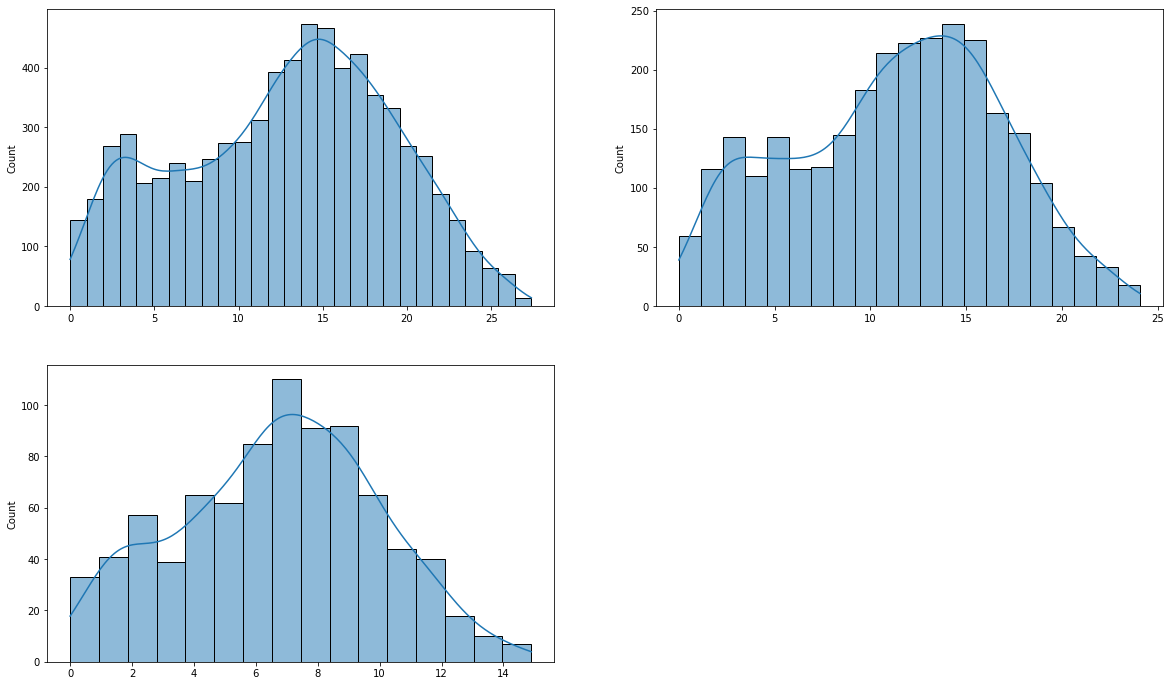

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.histplot(data=weather1, kde=True)
plt.subplot(2,2,2)
sns.histplot(data=weather2, kde=True)
plt.subplot(2,2,3)
sns.histplot(data=weather3, kde=True)
plt.show()

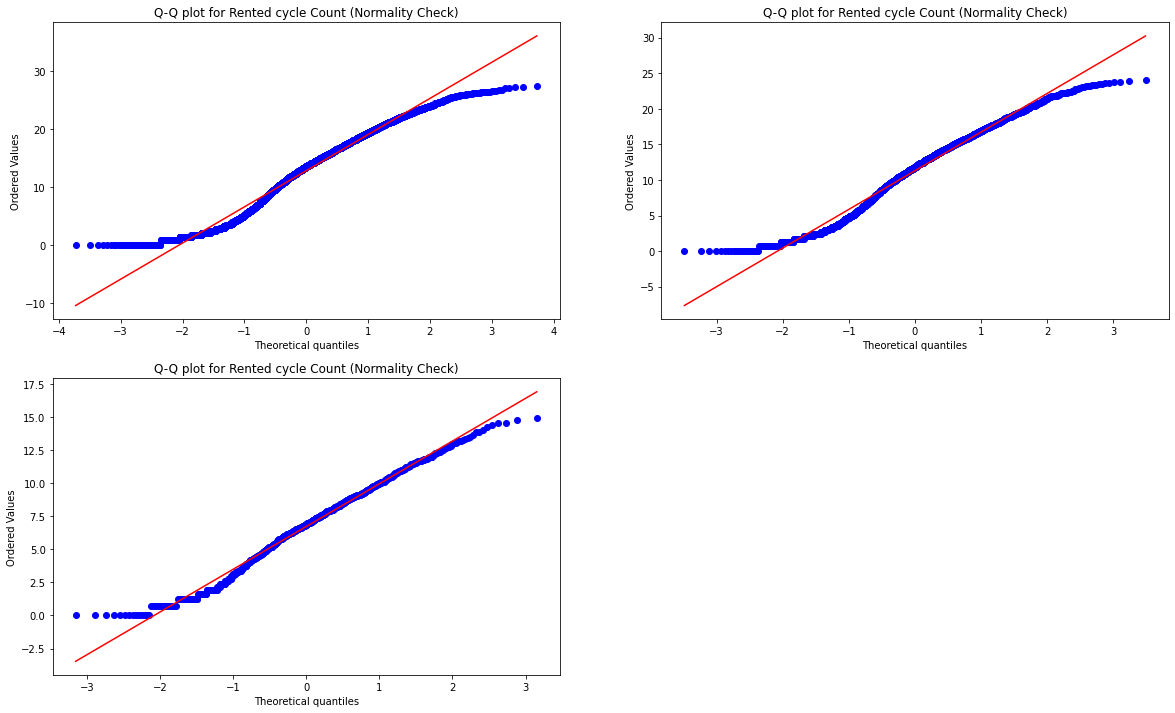

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
stats.probplot(weather1, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(2,2,2)
stats.probplot(weather2, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.subplot(2,2,3)
stats.probplot(weather3, plot= plt, dist="norm")
plt.title('Q-Q plot for Rented cycle Count (Normality Check)')
plt.show()

The plots tends to look like a normal **gaussian distribution**. it also satisfies the QQ - Plots for normality check to some extent, even though there is still some difference.

C) ***Homogeneity of Variances using Levene's test***

* **Null Hypothesis(H0)** - Homogenous Variance

* **Alternate Hypothesis(HA)** - Non Homogenous variance

In [ ]:
stat,p = levene(weather1,weather2,weather3)
print('P-value :',p)

P-value : 1.0502360215620662e-101


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


We **reject null hypothesis**, which means the **variance is not similar** across all the groups. But, we will still go ahead and perform our one-way ANOVA

D) ***Performing One-Way Anova***

In [ ]:
stat,p = stats.f_oneway(weather1,weather2,weather3)
print('P-value :',p)

P-value : 3.4867243611236345e-181


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


# ***Answer:***

---


***We reject null hypothesis, which means the number of electric cycles rented on different Weathers are different.***

# ***Question-4:- Weather is dependent on season or not? (check between 2 predictor variable) ~ Chi-square test***

---
The **Chi-square statistic is a non-parametric** (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data. 




***STEP-1*** : Set up Null Hypothesis

---
1. **Null Hypothesis ( H0 )** - weather is independent of season

2. **Alternate Hypothesis ( HA )** -weather is dependent of seasons.

***STEP-2***: Checking for basic assumpitons for the hypothesis (Non-Parametric Test)

---
1. The data in the cells should be **frequencies**, or **counts** of cases.
2. The levels (or categories) of the variables are **mutually** **exclusive**. That is, a particular subject fits into one and only one level of each of the variables. 
3. There are 2 variables, and both are measured as **categories**.
4. The **value of the cell expecteds should be 5 or more**in at least 80% of the cells, and no cell should have an expected of less than one (3).


***STEP-3***: Define Test statistics; Distribution of T under H0.

---
The test statistic for a Chi- square test is denoted as T. Under H0, the test statistic should follow **Chi-Square Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed t-test.**

***STEP-5***: Compute the p-value and fix value of alpha.

---
we will be computing the chi square-test p-value using the chi 2 function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

---

Based on p-value, we will accept or reject H0.

1. **p-val > alpha** : Accept H0
2. **p-val < alpha** : Reject H0

In [ ]:
cont = pd.crosstab(yulu['weather'],yulu['season'])
value = np.array([cont.iloc[0][0:4].values ,cont.iloc[1][0:4].values ,cont.iloc[2][0:4].values])

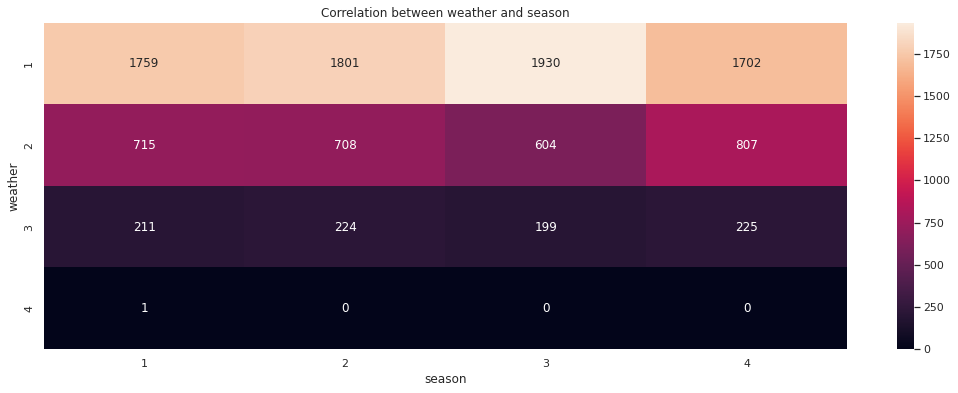

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(cont, annot=True, fmt='.6g')
plt.title('Correlation between weather and season')
plt.show()

***We will be dropping the last row as frequency/count is less than 3.***

**Performing chi-square test**

In [ ]:
c, p, dof, expected = stats.chi2_contingency(value)
print('P-value :',p)

P-value : 2.8260014509929403e-08


In [ ]:
htResult(p)

Reject NULL HYPOTHESIS


# ***Answer:***

---


**We reject null hypothesis, which means that the season has impact on the weather.**

# ***Observations and Conclusions:***

---


1.   **Season** - Count of rented bikes are maximum in season 3 and minimum in season 1
2.   **Weather** - Count of rented bikes are maximum in weather 1 and falls sharply in weather 3 and 4.
3. **Temperature** - Count of rented bikes are very low at lower temperatures and rises with increase in temperature.
4. **Time of day** - Count of cycle rent falls steeply through the night and attains peak during the day.
5. Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.
6. Cycles rented on working and non-working days are similar in number.
7. Casual Cycles rented on Weekends are higher than Registered cycles rented on weekends.
8. Registered cycles rented on working days are higher than casual cycles rented on working days.




## ***Recommendations:***

---

1. The EDA suggests that count of cycle rented is very low during season 1. **Yulu can rollout some challenges during this season, like New year goals on fitness and roll out exciting prizes for people participating in this season**.

2. The count of cycle is very low during the night hours. **Yulu can introduce some safety features in its app and also some promotional discounts for people renting yulu bikes from 12am - 6am**, which can motivate people to ride Yulu bikes during this time frame.

3. The count of bikes rented on holidays are significantly lower than on non-holidays. **Yulu can set up bike centers near entertainment hotspots, like malls and amusemennt parks to hike up its rental count on weekends and holidays.**

4. The EDA proves that Temperature, humidity, windspeed and weather - all these environmental factors affect the count of bikes rented on Yulu. Even though Yulu can not change the weather conditions, **Yulu can offer reduced pricing for people renting in these weather conditions (weather 2 & 3).**

5. Yulu can introduce exclusive benifits for registered users to get more users to register, which can pull up the amount of cycles rented per hour.

6. Yulu can introduce some early biker scheme (4am -7am), **that would target the people who are motivated in physical fitness and also roll out some exciting prizes for people covering the longest distance rides**.
